In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import librosa
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

INDEX = 13
DATA_DIR = './new-test-data/test-mfcc-v2' #update with where you stored the file
DATA2_DIR = './new-test-data/test-mfcc-v2-copy'
def aggregate_mfcc_selective(mfcc_data):
    mfcc_selected = mfcc_data[INDEX:, :]
    #features for data from 13-20
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

def aggregate_mfcc_selective2(mfcc_data):
    mfcc_selected = mfcc_data[:3, :] # Select first 20 MFCCs
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []
total_songs = len(os.listdir(DATA_DIR))
# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
        file_path = os.path.join(DATA_DIR, file_name)
        file_path2 = os.path.join(DATA2_DIR, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])

        # Determine label based on filename pattern
        if file_name.startswith('Asha-Bhosle'):
            label = 'Asha Bhosle'
        elif file_name.startswith('Kishore-Kumar'):
            label = 'Kishore Kumar'
        elif file_name.startswith('Lavni'):
            label = 'Lavni'
        elif file_name.startswith('Michael-Jackson'):
            label = 'Michael Jackson'
        elif file_name.startswith('Jana-Gana-Mana'):
            label = 'Jana-Gana-Mana'
        elif file_name.startswith('Bhavgeet'):
             label = 'Bhavgeet'
        else:
            print(f'Unknown label for file: {file_name}')
            
        print(f'Processed {file_name}')
        print(f'Processed {index} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        index += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

total_data_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_df.insert(0, 'File', file_names)
total_data_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_df.to_csv(f'features_generated_{INDEX}.csv', index=False)


Processed Asha-Bhosle-23.csv
Processed 1 of 495
Processed Michael-Jackson-55.csv
Processed 2 of 495
Processed Kishore-Kumar-63.csv
Processed 3 of 495
Processed Asha-Bhosle-32.csv
Processed 4 of 495
Processed Jana-Gana-Mana-8-MFCC.csv
Processed 5 of 495
Processed Bhavgeet-47.csv
Processed 6 of 495
Processed Lavni-20.csv
Processed 7 of 495
Processed Bhavgeet-61.csv
Processed 8 of 495
Processed Michael-Jackson-42.csv
Processed 9 of 495
Processed Asha-Bhosle-71.csv
Processed 10 of 495
Processed Bhavgeet-14.csv
Processed 11 of 495
Processed Michael-Jackson-17.csv
Processed 12 of 495
Processed Bhavgeet-18.csv
Processed 13 of 495
Processed Asha-Bhosle-47.csv
Processed 14 of 495
Processed Kishore-Kumar-5-MFCC.csv
Processed 15 of 495
Processed Michael-Jackson-24.csv
Processed 16 of 495
Processed Bhavgeet-5-MFCC.csv
Processed 17 of 495
Processed Michael-Jackson-71.csv
Processed 18 of 495
Processed Jana-Gana-Mana-49.csv
Processed 19 of 495
Processed Asha-Bhosle-66.csv
Processed 20 of 495
Processe

In [3]:
import re

UNLABELLED_DIR = './data-v2'
UNLABELLED_DIR2 = './data-v2-copy'
# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []
total_songs = len(os.listdir(UNLABELLED_DIR))

# Function to extract the numeric part of the filename
def extract_number(file_name):
    match = re.search(r'(\d+)-MFCC.csv', file_name)
    if match:
        return int(match.group(1))
    return float('inf')  # In case the file doesn't match the pattern

# Sort files based on the numeric part of the filename
file_list = sorted(os.listdir(UNLABELLED_DIR), key=extract_number)

# Iterate over all files in the specified directory
for file_name in tqdm(file_list):
        file_path = os.path.join(UNLABELLED_DIR, file_name)
        file_path2 = os.path.join(UNLABELLED_DIR2, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])
            
        # print(f'Processed {file_name}')
        # print(f'Processed {index} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        index += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

labels = 'NULL'
total_data_unlabelled_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_unlabelled_df.insert(0, 'File', file_names)
total_data_unlabelled_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_unlabelled_df.to_csv(f'unlabelled_features_generated_{INDEX}.csv', index=False)

complete_data = pd.concat([total_data_df, total_data_unlabelled_df], ignore_index=True)

100%|██████████| 116/116 [02:19<00:00,  1.20s/it]


In [4]:

# Splitting the data into features (X) and labels (y)
y = complete_data['Label']
X = complete_data.drop(columns=['File', 'Label'])


Shape of dataset: (611, 658)

Columns in dataset:
 Index(['File', 'Label', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=658)

First 5 rows of the dataset:
                         File            Label  feature_0  feature_1  \
0         Asha-Bhosle-23.csv      Asha Bhosle -12.033679  -9.780576   
1     Michael-Jackson-55.csv  Michael Jackson  -2.017992   4.719863   
2       Kishore-Kumar-63.csv    Kishore Kumar   2.609654  -4.029758   
3         Asha-Bhosle-32.csv      Asha Bhosle  -7.141288   2.708933   
4  Jana-Gana-Mana-8-MFCC.csv   Jana-Gana-Mana   0.578080   2.455614   

   feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  ...  \
0 -11.141942  -9.832152  -8.217274  -9.227260  -6.950433   9.64

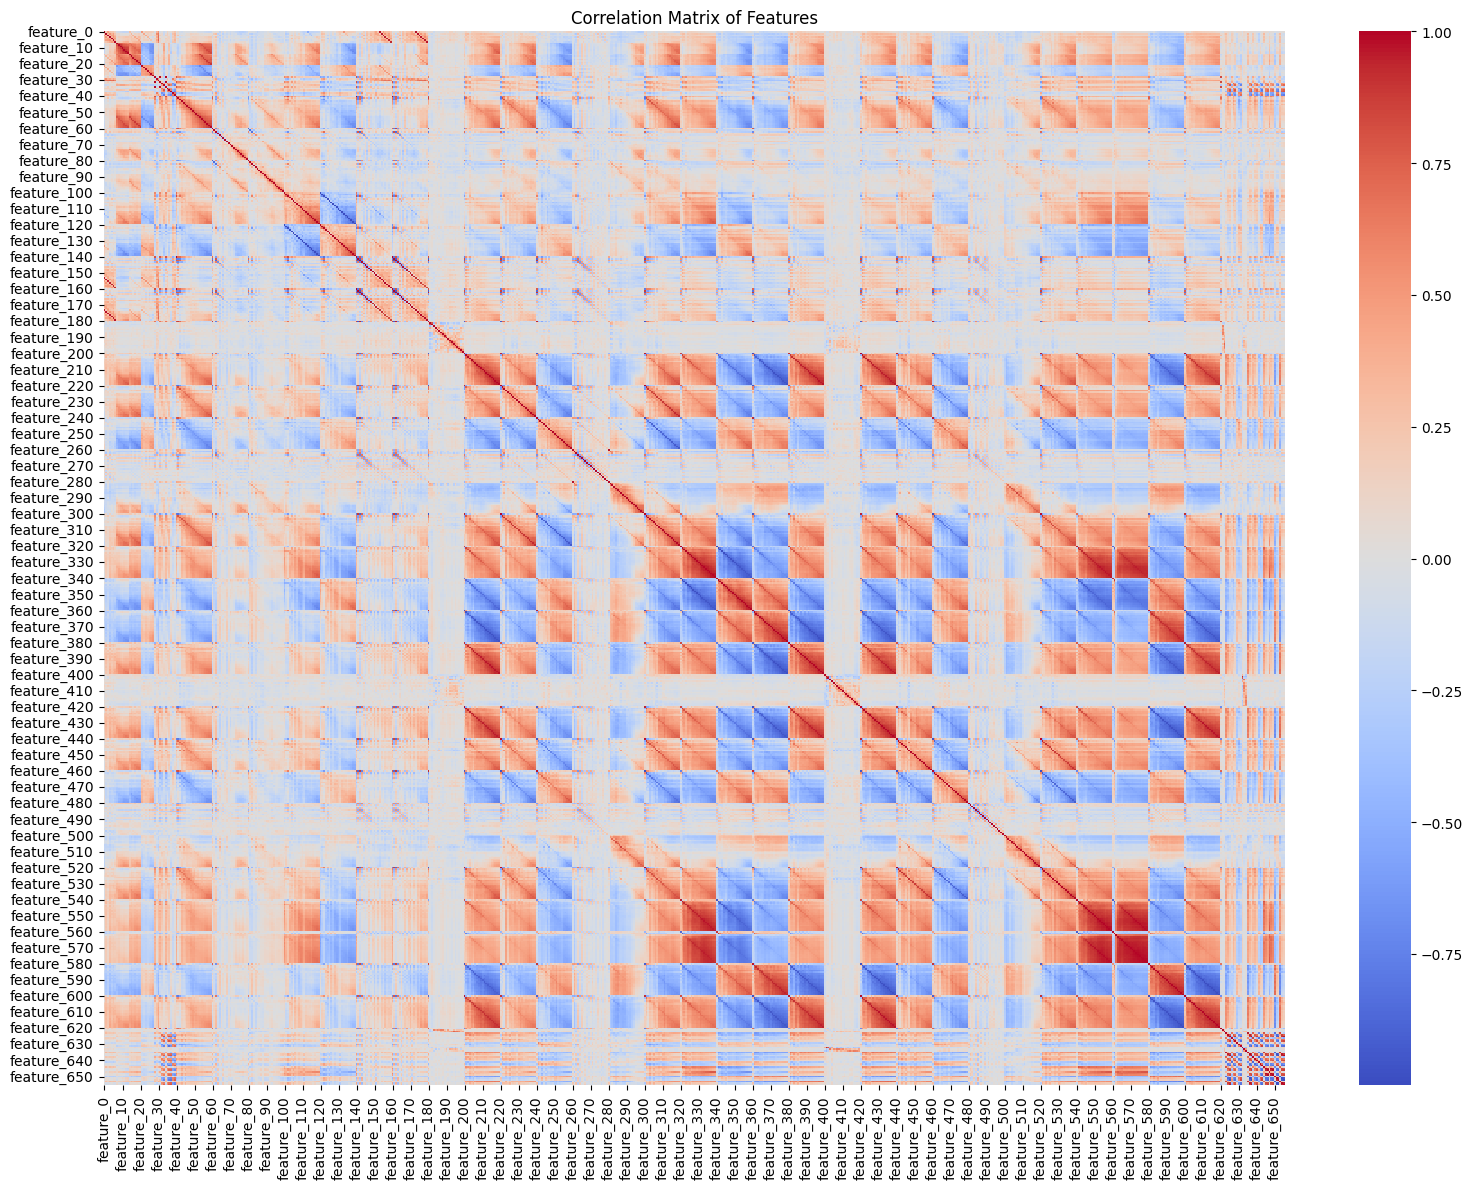


Label distribution in 'Label':
 Label
NULL               116
Asha Bhosle         97
Bhavgeet            93
Kishore Kumar       92
Michael Jackson     82
Lavni               74
Jana-Gana-Mana      57
Name: count, dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of dataset:", complete_data.shape)
print("\nColumns in dataset:\n", complete_data.columns)
print("\nFirst 5 rows of the dataset:\n", complete_data.head())
print("\nData Types of each column:\n", complete_data.dtypes)
print("\nMissing values in each column:\n", complete_data.isnull().sum())

print("\nStatistical Summary:\n", complete_data.describe())
print("\nNumber of duplicate rows:", complete_data.duplicated().sum())

correlation_matrix = X.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('Images/correlation_matrix.png', dpi=1000)
plt.show()

label_column = 'Label'
print(f"\nLabel distribution in '{label_column}':\n", complete_data[label_column].value_counts())
# label_column = 'Label'  # Replace 'label' with the actual name of the label column in your dataset
# if label_column in total_data_df.columns:
#     print(f"\nNumber of unique labels in '{label_column}':", df[label_column].nunique())
#     print(f"\nLabel distribution in '{label_column}':\n", df[label_column].value_counts())
# else:
#     print(f"\nWarning: Column '{label_column}' not found in the dataset.")


#Add a Correlation HeatMap

#too many features to analyse the plots of all of them manually 

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (scaling them to have mean 0 and std 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

X_columns = X.columns

features_scaled_df = pd.DataFrame(features_scaled, columns=X_columns)
X = features_scaled_df
X

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    -1.879924  -1.506874  -1.826547  -1.650989  -1.423729  -1.914222   
1     0.419660   1.722345   0.505256   1.757567   0.502464   1.129636   
2     1.482158  -0.226178  -0.249628  -0.846986  -0.418173   0.614931   
3    -0.756640   1.274515   1.368609  -0.000844   0.646090   0.706165   
4     1.015713   1.218101   0.535349   0.188973   0.149084   0.635573   
..         ...        ...        ...        ...        ...        ...   
606   1.925973  -1.251535   0.031800   0.775216  -0.514499   0.900251   
607  -0.338537   0.184437   0.110758  -0.206720   0.961074   0.738822   
608   0.245140   1.193131  -0.445248   0.739152  -0.159610   0.664055   
609   0.509487   1.065715   0.676211   1.146552   1.014801   1.512249   
610  -0.516759   0.556256  -0.427497  -1.825659   0.698945   0.439629   

     feature_6  feature_7  feature_8  feature_9  ...  feature_646  \
0    -1.231581   0.271576   0.729758   0.217367  ...    -0.412531   
1     0.351265  -0.944944  -0.746070  -0.803920  ...     0.906924   
2    -0.663209  -0.596129  -0.674325  -0.905168  ...     0.972932   
3     0.674195   0.708456   0.967808   0.975013  ...     0.178621   
4     0.668984  -1.277467  -1.187331  -1.653361  ...    -0.965341   
..         ...        ...        ...        ...  ...          ...   
606   1.853636   1.011093   1.257546   1.573328  ...    -0.343806   
607   0.310959   1.584429   1.396294   1.224846  ...    -0.058010   
608  -0.384713  -0.167446  -0.613191  -0.589776  ...    -0.518456   
609   1.811500   1.598824   1.298712   1.499364  ...    -0.239299   
610  -1.212952  -0.608006  -1.139055  -0.916893  ...    -1.007805   

     feature_647  feature_648  feature_649  feature_650  feature_651  \
0       0.450566    -0.002394    -0.409435    -1.002998    -0.241976   
1      -1.011854     1.421913     1.116600    -1.542929    -0.734841   
2      -0.974982     0.762701     0.890656     0.951301    -1.896138   
3       1.734313     0.489283     0.299001    -2.164560    -0.434755   
4      -1.317421    -1.228748    -1.138623     1.366153     1.395591   
..           ...          ...          ...          ...          ...   
606     0.029645    -0.615820    -0.365092    -0.673505     0.187560   
607     0.595003    -0.008070     0.072239     0.262243     0.216272   
608    -0.234228    -0.754117    -0.466086     1.203695     1.434571   
609    -0.075905    -0.622898    -0.230613     0.927169     1.132398   
610    -1.261091    -1.226276    -1.223020     0.585719     0.772310   

     feature_652  feature_653  feature_654  feature_655  
0       0.316362     0.623544     0.365305    -0.337186  
1      -0.560590     1.520704     0.597232     0.233375  
2      -2.083974    -1.028208     1.923422     2.161224  
3      -0.223589     1.949352     0.395036     0.237137  
4       1.140184    -1.382905    -1.436877    -1.139550  
..           ...          ...          ...          ...  
606    -0.053727     0.860746    -0.171351     0.282202  
607     0.234487     0.230419    -0.445377    -0.257285  
608     1.152423    -0.953467    -1.384936    -1.081409  
609     0.729150    -0.676107    -1.056790    -0.792355  
610     0.882732    -0.892063    -0.644296    -0.847068  

[611 rows x 656 columns]

In [12]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector = VarianceThreshold(threshold=0.1)
print(X.shape)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])


(611, 656)
(611, 656)


Shape after dropping constant/correlated features: (611, 472)


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


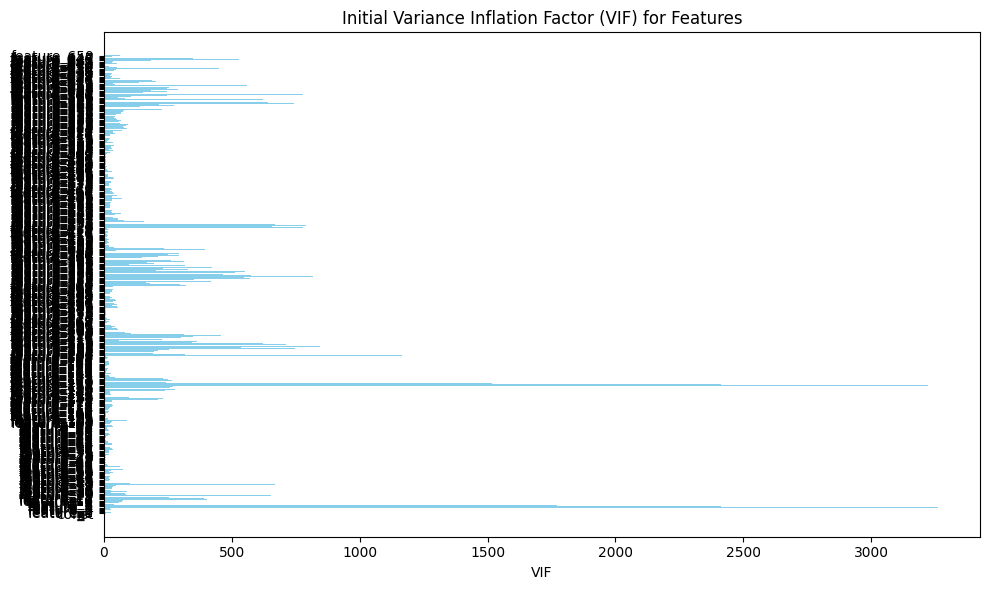


Initial VIF values for each feature:
         Feature         VIF
0          const    8.595713
1      feature_0   27.718198
2      feature_1   25.626228
3      feature_2   28.381594
4      feature_3   25.750517
..           ...         ...
468  feature_644  183.511686
469  feature_645  527.805610
470  feature_646  347.909495
471  feature_647   31.498212
472  feature_650   65.561288

[395 rows x 2 columns]
Dropping feature 'feature_4' with VIF: 3261.6104861620383
Dropping feature 'feature_5' with VIF: 2411.3141269794937
Dropping feature 'feature_6' with VIF: 1770.3027376263371
Dropping feature 'feature_157' with VIF: 3222.852648444189
Dropping feature 'feature_158' with VIF: 2410.5080847307568
Dropping feature 'feature_159' with VIF: 1516.5847022322089
Dropping feature 'feature_200' with VIF: 1164.1437255633377
Dropping feature 'feature_208' with VIF: 843.7657457123418
Dropping feature 'feature_328' with VIF: 816.4594636385791
Dropping feature 'feature_426' with VIF: 779.9413347674022


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Final VIF values after dropping features:
         Feature         VIF
0          const  126.294775
1      feature_0   24.732972
2      feature_1   22.956800
3      feature_2   22.464003
4      feature_3   23.629013
..           ...         ...
456  feature_644  154.758200
457  feature_645  493.284235
458  feature_646  322.736159
459  feature_647   30.327378
460  feature_650   58.750068

[383 rows x 2 columns]


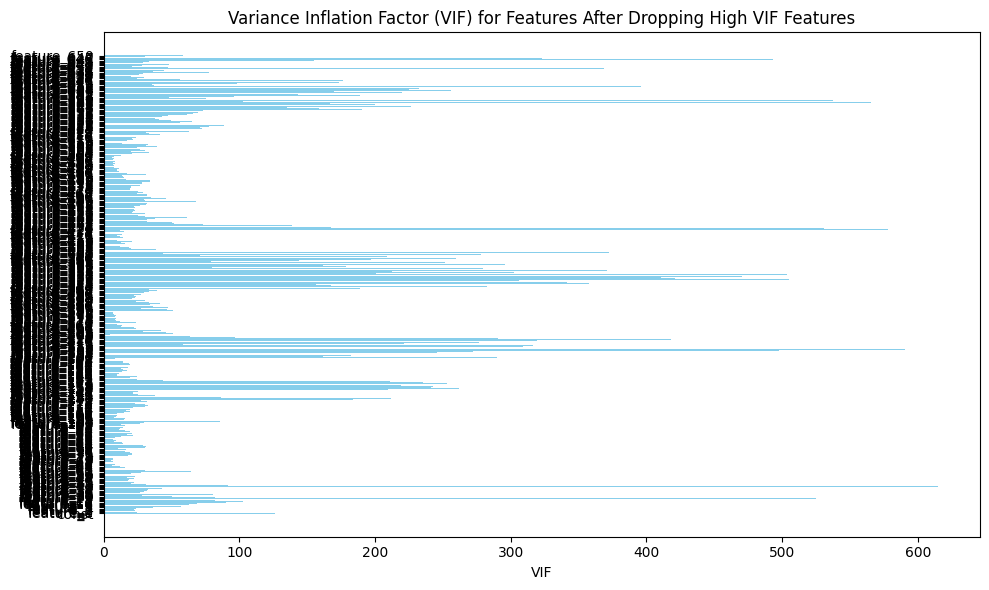


Shape of the dataset after removing high VIF features: (611, 460)


In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_selected is your feature matrix (DataFrame)
# X_selected = your_data

# Check for constant features and drop them
constant_features = X_selected.columns[X_selected.nunique() == 1]
X_selected = X_selected.drop(columns=constant_features)

# Check for highly correlated features and drop them (optional)
corr_matrix = X_selected.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Adjust the threshold as needed
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

X_selected = X_selected.drop(columns=correlated_features)
print(f"Shape after dropping constant/correlated features: {X_selected.shape}")

# Add a constant to the model (for intercept)
X_with_const = sm.add_constant(X_selected)

# Function to calculate VIF for the current dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Remove infinite or NaN VIF values
    vif_data = vif_data[~vif_data['VIF'].isin([np.inf, -np.inf, np.nan])]
    return vif_data


# Initial VIF calculation
vif_data = calculate_vif(X_with_const)

# Plot initial VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Initial Variance Inflation Factor (VIF) for Features')
plt.tight_layout()
plt.savefig('Images/initial_vif.png', dpi=1000)
plt.show()

print("\nInitial VIF values for each feature:")
print(vif_data)

# Define the threshold
threshold = 750

# Use a for loop to iterate over the features and remove those with VIF > threshold
features_to_drop = vif_data[vif_data['VIF'] > threshold]['Feature']

# Drop all features that exceed the threshold
for feature in features_to_drop:
    if feature in X_selected.columns:  # Check if the feature exists in X_selected
        print(f"Dropping feature '{feature}' with VIF: {vif_data[vif_data['Feature'] == feature]['VIF'].values[0]}")
        X_selected = X_selected.drop(columns=[feature])

# Recompute VIF for the remaining features
X_with_const = sm.add_constant(X_selected)
vif_data = calculate_vif(X_with_const)

# Display the final VIF values after dropping high VIF features
print("\nFinal VIF values after dropping features:")
print(vif_data)

# Plot VIF after dropping features
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Features After Dropping High VIF Features')
plt.tight_layout()
plt.savefig('Images/final_vif.png', dpi=1000)
plt.show()

# Final shape of the dataset after dropping high VIF features
print(f"\nShape of the dataset after removing high VIF features: {X_selected.shape}")

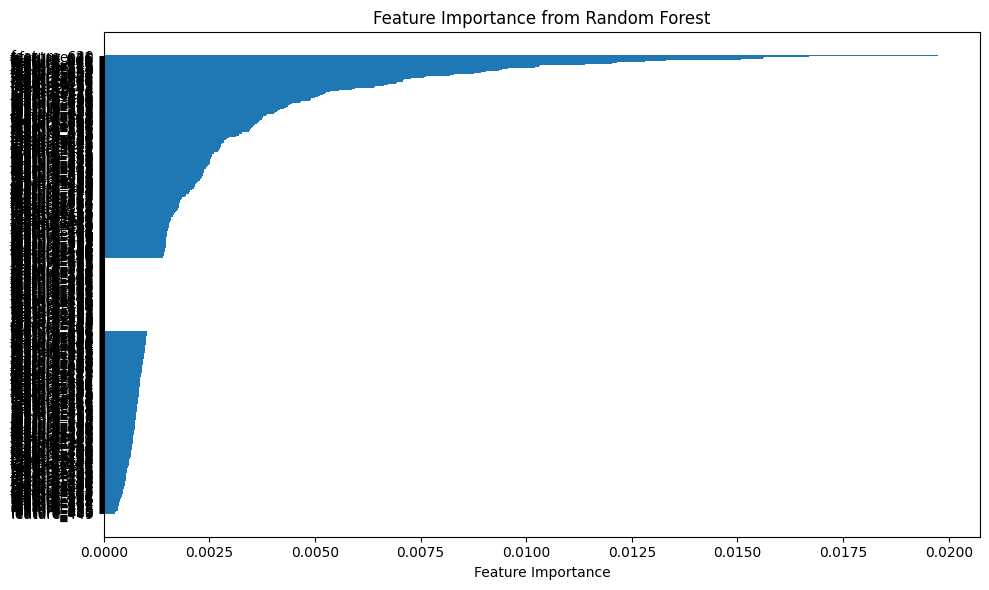

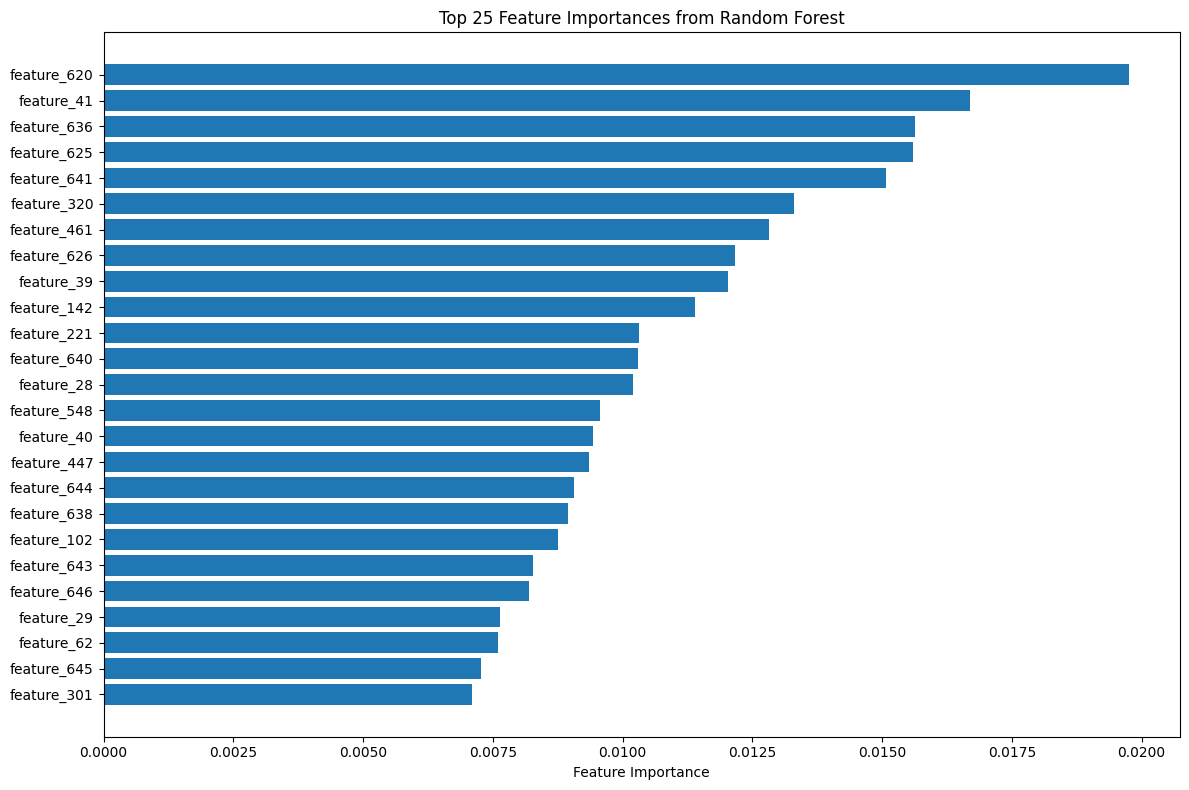

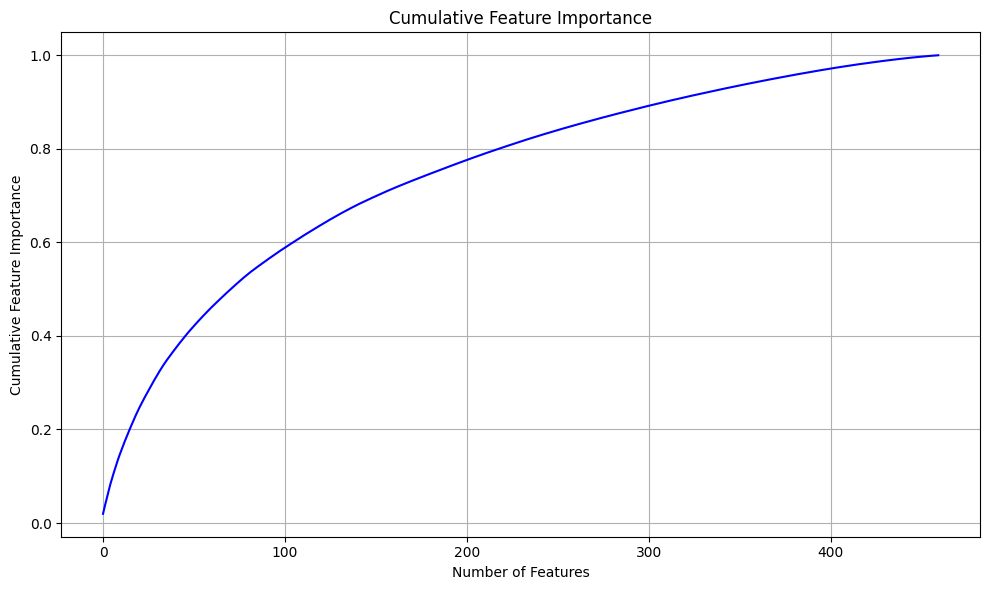

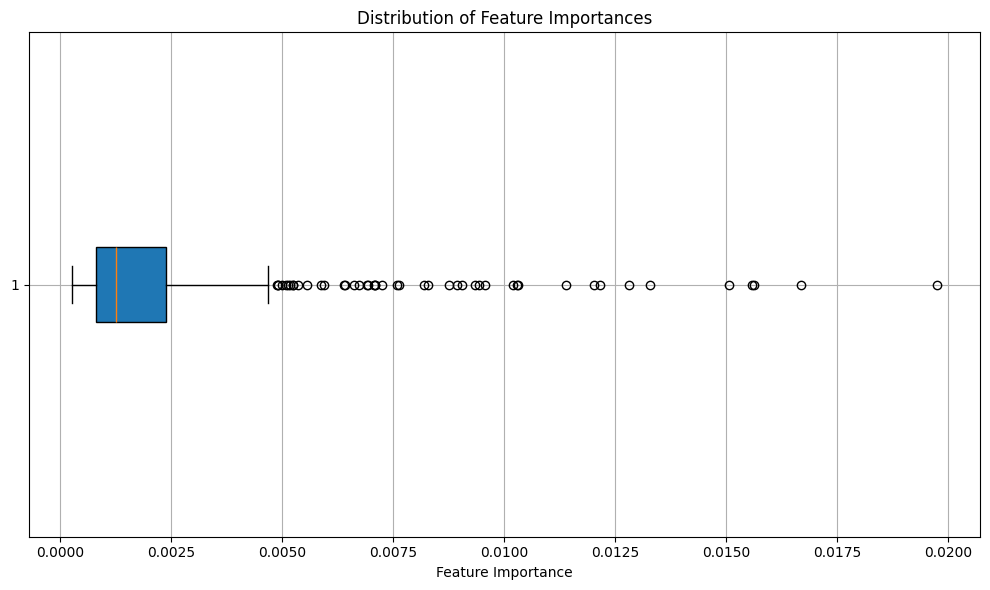

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_selected, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig('Images/feature_importances.png', dpi=1000)
plt.show()

# 1. Feature Importance Plot with Top N Features
top_n = 25  # You can change this value
top_idx = sorted_idx[-top_n:]

plt.figure(figsize=(12, 8))
plt.barh(X_selected.columns[top_idx], importances[top_idx], align='center')
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importances from Random Forest')
plt.tight_layout()
plt.savefig('Images/top_feature_importances.png', dpi=1000)
plt.show()

# 2. Cumulative Feature Importance
importances_sorted = importances[sorted_idx][::-1]
cumulative_importance = importances_sorted.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_importance)), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Feature Importance')
plt.title('Cumulative Feature Importance')
plt.grid()
plt.tight_layout()
plt.savefig('Images/cumulative_feature_importance.png', dpi=1000)  
plt.show()

# 3. Boxplot of Feature Importances
plt.figure(figsize=(10, 6))
plt.boxplot(importances, vert=False, patch_artist=True)
plt.title('Distribution of Feature Importances')
plt.xlabel('Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.savefig('Images/feature_importance_boxplot.png', dpi=1000)
plt.show()

# 4. Correlation Heatmap of Important Features
selected_features = X_selected.columns[importances > 0.0005]
important_features = X_selected[selected_features]

# correlation_matrix = important_features.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap of Important Features')
# plt.tight_layout()
# plt.savefig('Images/important_features_correlation.png', dpi=1000)
# plt.show()

# # 5. Pairplot of Top Important Features
# top_features = X_selected.columns[top_idx]
# top_data = pd.concat([X_selected[top_features], y], axis=1)

# sns.pairplot(top_data, hue=y.name, palette='viridis')
# plt.suptitle('Pairplot of Top Important Features')
# plt.tight_layout()
# plt.savefig('Images/pairplot_top_features.png', dpi=1000)
# plt.show()

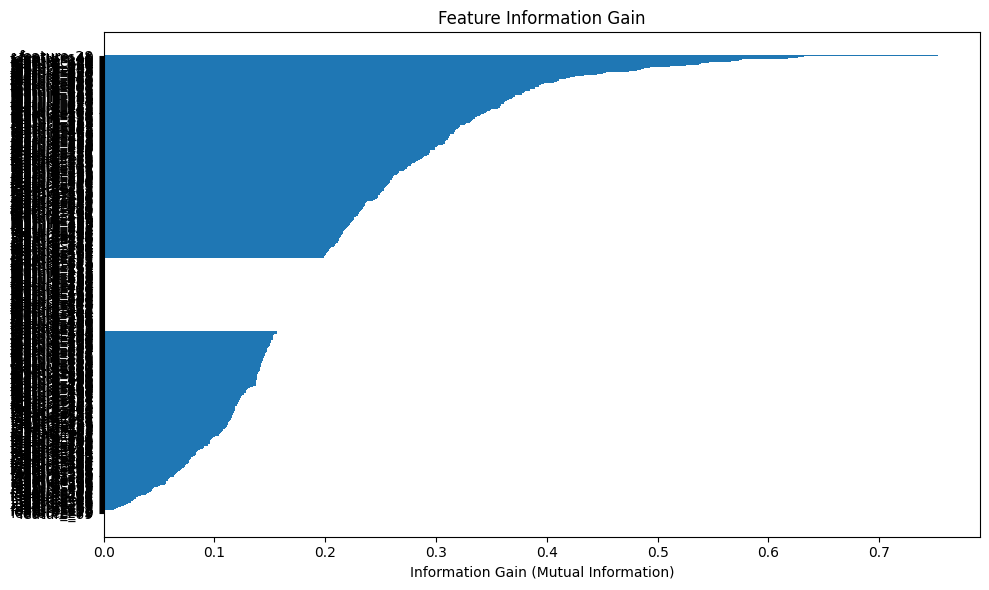

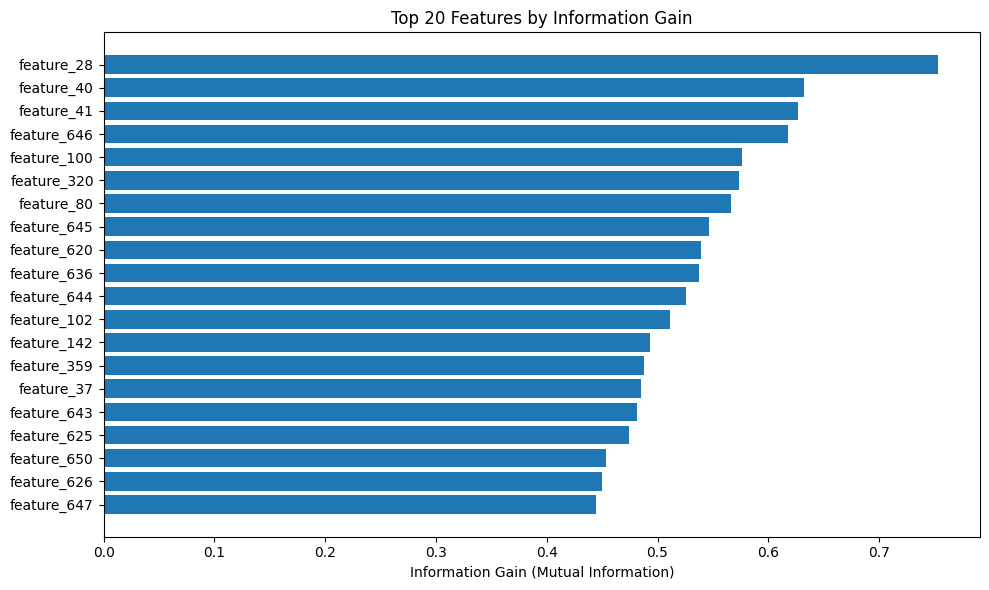

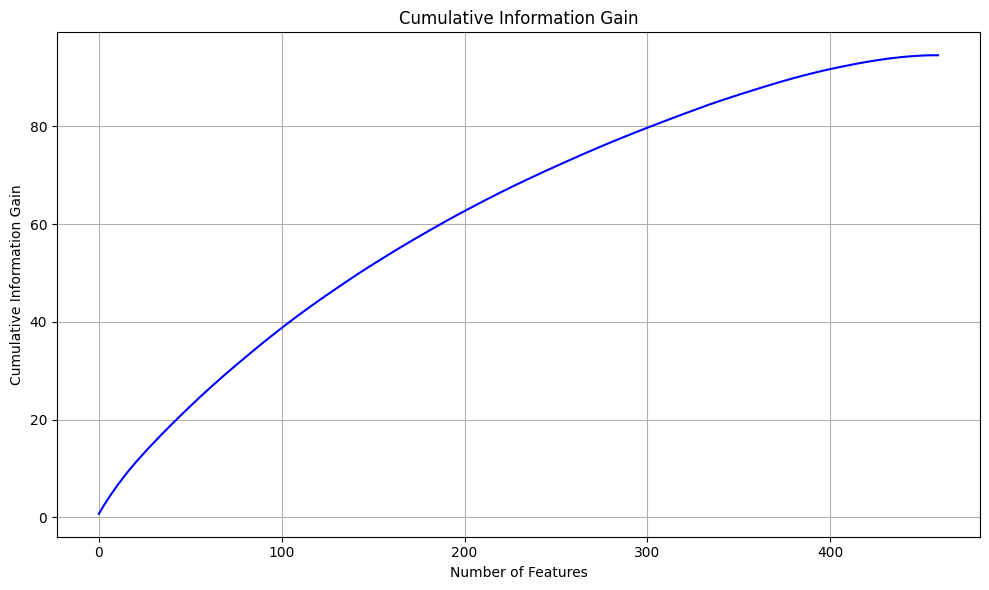

Selected features (info gain > 0.05): Index(['feature_1', 'feature_2', 'feature_3', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       ...
       'feature_639', 'feature_640', 'feature_641', 'feature_642',
       'feature_643', 'feature_644', 'feature_645', 'feature_646',
       'feature_647', 'feature_650'],
      dtype='object', length=432)


In [16]:
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X_selected, y)

# Use X_selected.columns to match the feature set size
selected_features = X_selected.columns[info_gain > 0.05]

# Sort information gain in descending order
sorted_idx = info_gain.argsort()

# 1. Bar Plot of Information Gain for Each Feature
plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], info_gain[sorted_idx], align='center')
plt.xlabel('Information Gain (Mutual Information)')
plt.title('Feature Information Gain')
plt.tight_layout()
plt.savefig('Images/feature_information_gain.png', dpi=1000)
plt.show()

# 2. Top N Features by Information Gain
top_n = 20  # You can change this to the number of top features you want to visualize
top_idx = sorted_idx[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[top_idx], info_gain[top_idx], align='center')
plt.xlabel('Information Gain (Mutual Information)')
plt.title(f'Top {top_n} Features by Information Gain')
plt.tight_layout()
plt.savefig('Images/top_features_information_gain.png', dpi=1000)
plt.show()

# 3. Cumulative Information Gain
info_gain_sorted = info_gain[sorted_idx][::-1]
cumulative_info_gain = info_gain_sorted.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_info_gain)), cumulative_info_gain, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Information Gain')
plt.title('Cumulative Information Gain')
plt.grid(True)
plt.tight_layout()
plt.savefig('Images/cumulative_information_gain.png', dpi=1000)
plt.show()

# # 4. Correlation Heatmap of Features with High Information Gain
# selected_features = X_selected.columns[info_gain > 0.05]
# important_features = X_selected[selected_features]

# plt.figure(figsize=(12, 8))
# sns.heatmap(important_features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap of Features with High Information Gain')
# plt.tight_layout()
# plt.savefig('Images/high_info_gain_correlation.png', dpi=1000)
# plt.show()

# # 5. Distribution of Information Gain
# plt.figure(figsize=(10, 6))
# plt.boxplot(info_gain, vert=False, patch_artist=True)
# plt.title('Distribution of Information Gain (Mutual Information)')
# plt.xlabel('Information Gain')
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('Images/info_gain_distribution.png', dpi=1000)
# plt.show()

# Print selected features based on information gain
print(f"Selected features (info gain > 0.05): {selected_features}")

# Optionally, drop less important features (info gain < 0.5)
X_selected = X_selected.drop(columns=X_selected.columns[info_gain < 0.5])

In [140]:
CURRENT = "PCA"

In [ ]:
#method of feature selection 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print(X.shape)

lda = LDA(n_components=5)  # LDA can have a maximum of (number of classes - 1) components
X_reduced = lda.fit_transform(X, y)  # Transformed features for the classification model
print(X_reduced.shape)
#X_reduced

In [ ]:
#method of feature selection 2
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
print(X.shape)

# Select top k features based on chi-square score
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(abs(X), y)
print(X_selected.shape)
#X_selected

In [ ]:
#method of feature selection 3
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()
# Initialize RFE and fit to data
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print(X_rfe.shape)

#X_rfe

In [119]:
#method of feature selection 4
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels
y_encoded = label_encoder.fit_transform(y)

# Fit the Lasso model now using the encoded target
lasso = Lasso(alpha=0.1).fit(X, y_encoded)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X)
print(X_lasso.shape)


(611, 52)


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



In [52]:
#method of feature selection 5
from sklearn.decomposition import PCA

# Initialize PCA and fit to data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)


(611, 10)


In [ ]:
#method of feature selection 6
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features based on mutual information score
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [76]:
#method of feature selection 7
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X, y)
selected_features = X.columns[info_gain > 0.05]

# Print selected features
print(selected_features)

X_selected = X[selected_features]

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=628)


In [141]:
X_unlabelled = X_pca[y == 'NULL']        # For null values in y
X_labelled = X_pca[y != 'NULL']           # For non-null values in y
print(X_unlabelled.shape)
print(X_labelled.shape)
# Ensure X_labelled is a pandas DataFrame with the same index as y
X_labelled_df = pd.DataFrame(X_labelled, index=y[y != 'NULL'].index)

# Splitting into training (70%) and test (30%) datasets
X_train, X_test, y_train, y_test = train_test_split(X_labelled_df, y[y != 'NULL'], test_size=0.3, random_state=42)


(116, 10)
(495, 10)


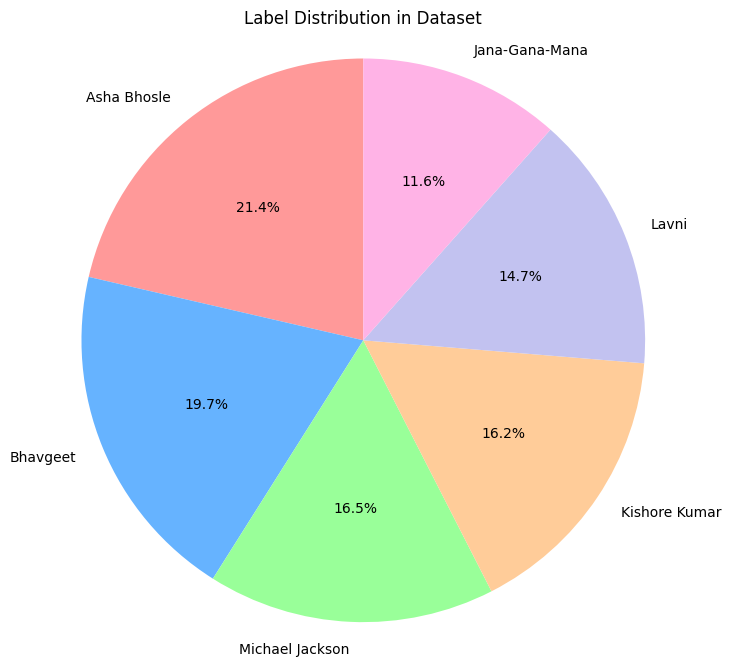

In [142]:

#making a pie chart to show weight of each label
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of the labels in your dataset (replace it with your actual labels)
labels = ['Asha Bhosale', 'Kishore Kumar', 'Lavni', 'Michael Jackson', 'Jana Gana Mana', 'Bhavgeet']  

# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

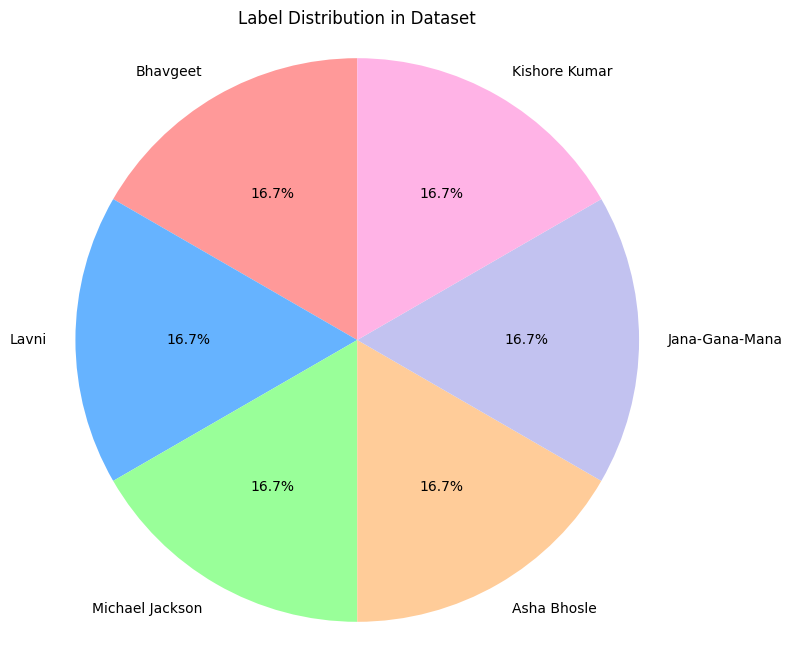

In [143]:
#from the above pie chart we can tell that the data is imbalanced, to fix the data imbalance we can use SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)


# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [144]:
from sklearn.preprocessing import LabelEncoder

#dimensional reduction

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #'SVM': SVC(kernel='rbf', C=1.0, probability=True), # SVC with probability=True for probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1),
    # 'SVC_linear': SVC(kernel='linear', probability=True),
    # 'SVC_rbf': SVC(kernel='rbf', probability=True),
    'RandomForest_1': RandomForestClassifier(min_samples_leaf=1),
    'RandomForest_3': RandomForestClassifier(min_samples_leaf=3),
    'RandomForest_5': RandomForestClassifier(min_samples_leaf=5),
    'NeuralNetwork_1': MLPClassifier(hidden_layer_sizes=(5)),
    'NeuralNetwork_2': MLPClassifier(hidden_layer_sizes=(5, 5)),
    'NeuralNetwork_3': MLPClassifier(hidden_layer_sizes=(5, 5, 5)),
    'NeuralNetwork_4': MLPClassifier(hidden_layer_sizes=(10))

}


In [146]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

def draw_roc_curve(model, X, y, label):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['x1', 'x2'])

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X)
    else:
        y_prob = model.decision_function(X)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())

    fpr, tpr, _ = roc_curve(pd.get_dummies(y).values.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(pd.get_dummies(y), y_prob, multi_class='ovr')
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {CURRENT}')
    plt.tight_layout()
    plt.legend()


Training Logistic Regression...



Training K-Nearest Neighbors...



Training Random Forest...



Training Gradient Boosting...



Training AdaBoost...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha


Training Naive Bayes...



Training Decision Tree...



Training XGBoost...



Training RandomForest_1...



Training RandomForest_3...



Training RandomForest_5...



Training NeuralNetwork_1...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_2...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_3...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_4...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Metrics have been saved to model_evaluation_metrics.csv


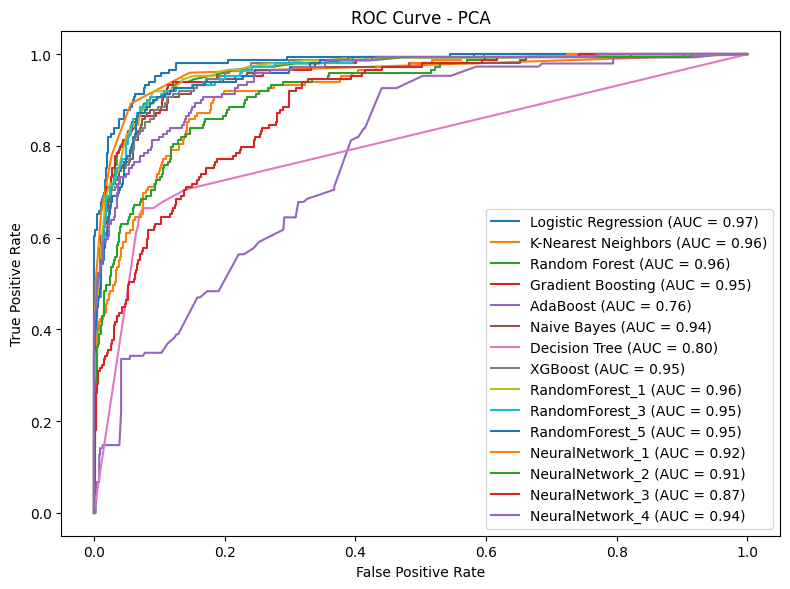

In [147]:
import plotly.graph_objects as go
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

results = {}

plt.figure(figsize=(8, 6))

# Training, prediction, and metric calculations
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train_encoded)  # Train the model
    y_pred_train = model.predict(X_train) #Predict on train set
    y_pred_test = model.predict(X_test)  # Predict on the test set

    precisions = [classification_report(y_test_encoded, y_pred_test, output_dict=True)[str(i)]['precision'] for i in range(6)]
    recalls = [classification_report(y_test_encoded, y_pred_test, output_dict=True)[str(i)]['recall'] for i in range(6)]
    f1_scores = [classification_report(y_test_encoded, y_pred_test, output_dict=True)[str(i)]['f1-score'] for i in range(6)]
    
    # Storing metrics
    results[model_name] = {
        "Accuracy_Train": accuracy_score(y_train_encoded, y_pred_train),
        "Accuracy_Test": accuracy_score(y_test_encoded, y_pred_test),
        "Precision_Train": precision_score(y_train_encoded, y_pred_train, average='weighted'),
        "Precision_Test": precision_score(y_test_encoded, y_pred_test, average='weighted'),
        "Recall_Train": recall_score(y_train_encoded, y_pred_train, average='weighted'),
        "Recall_Test": recall_score(y_test_encoded, y_pred_test, average='weighted'),
        "F1 Score_Train": f1_score(y_train_encoded, y_pred_train, average='weighted'),
        "F1 Score_Test": f1_score(y_test_encoded, y_pred_test, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred_test),
        "Classification Report": classification_report(y_train_encoded, y_pred_train),
        "Classification Report": classification_report(y_test_encoded, y_pred_test),
    }

    # Plotting the ROC curve
    draw_roc_curve(model, X_test, y_test_encoded, model_name)

    # Plotting the confusion matrix using Plotly with numbers displayed and square grid
    confusion_mat = results[model_name]["Confusion Matrix"]
    fig = go.Figure(data=go.Heatmap(
        z=confusion_mat,
        x=[f"Predicted {i}" for i in range(len(confusion_mat))],
        y=[f"Actual {i}" for i in range(len(confusion_mat))],
        colorscale="Blues",
        text=confusion_mat,  # Display numbers in each cell
        texttemplate="%{text}",  # Format to show text values
        showscale=True
    ))
    fig.update_layout(
        title=f"Confusion Matrix for {model_name}",
        xaxis_title="Predicted Label",
        yaxis_title="Actual Label",
        xaxis=dict(scaleanchor="y", scaleratio=1)  # Ensures square cells
    )
    fig.show()

plt.savefig(f'Images/roc_curve_{CURRENT}.png', dpi=500)

# Saving the metrics to a CSV file
metrics = []
for model_name, metric_dict in results.items():
    metrics.append({
        "Model": model_name,
        "Accuracy_Train": metric_dict["Accuracy_Train"],
        "Accuracy_Test": metric_dict["Accuracy_Test"],
        "Precision_Train": metric_dict["Precision_Train"],
        "Precision_Test": metric_dict["Precision_Test"],
        "Recall_Train": metric_dict["Recall_Train"],
        "Recall_Test": metric_dict["Recall_Test"],
        "F1 Score_Train": metric_dict["F1 Score_Train"],
        "F1 Score_Test": metric_dict["F1 Score_Test"],
    })

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Save to CSV
df_metrics.to_csv(f'Metrics/{CURRENT}_model_evaluation_metrics.csv', index=False)

print("Metrics have been saved to model_evaluation_metrics.csv")

In [148]:

# Display the results
for model_name, metrics in results.items():
    print(f"\nMetrics for {model_name}:\n")
    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")



Metrics for Logistic Regression:

Accuracy_Train:
0.8265765765765766

Accuracy_Test:
0.8456375838926175

Precision_Train:
0.8295146139263786

Precision_Test:
0.8500077047421662

Recall_Train:
0.8265765765765766

Recall_Test:
0.8456375838926175

F1 Score_Train:
0.8276523353875218

F1 Score_Test:
0.846944225274948

Confusion Matrix:
[[15  1  0  1  6  0]
 [ 2 21  0  0  1  1]
 [ 0  0 17  0  0  0]
 [ 0  0  1 34  0  1]
 [ 3  1  0  0 18  1]
 [ 3  0  0  0  1 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.91      0.84      0.88        25
           2       0.94      1.00      0.97        17
           3       0.97      0.94      0.96        36
           4       0.69      0.78      0.73        23
           5       0.88      0.84      0.86        25

    accuracy                           0.85       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.85    

In [149]:
print("\nAll Models Accuracy:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Accuracy_Train']:.4f}", f"{model_name}: {metrics['Accuracy_Test']:.4f}")


All Models Accuracy:
Logistic Regression: 0.8266 Logistic Regression: 0.8456
K-Nearest Neighbors: 0.8874 K-Nearest Neighbors: 0.8255
Random Forest: 0.9955 Random Forest: 0.8054
Gradient Boosting: 0.9955 Gradient Boosting: 0.7785
AdaBoost: 0.4505 AdaBoost: 0.4094
Naive Bayes: 0.7860 Naive Bayes: 0.7584
Decision Tree: 0.9505 Decision Tree: 0.6510
XGBoost: 0.9955 XGBoost: 0.7450
RandomForest_1: 0.9955 RandomForest_1: 0.7919
RandomForest_3: 0.9797 RandomForest_3: 0.7718
RandomForest_5: 0.9369 RandomForest_5: 0.7718
NeuralNetwork_1: 0.6486 NeuralNetwork_1: 0.6577
NeuralNetwork_2: 0.6892 NeuralNetwork_2: 0.6980
NeuralNetwork_3: 0.5788 NeuralNetwork_3: 0.5503
NeuralNetwork_4: 0.7680 NeuralNetwork_4: 0.7181


In [150]:
print("\nAll Models Precison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Precision_Train']:.4f}", f"{model_name}: {metrics['Precision_Test']:.4f}")


All Models Precison:
Logistic Regression: 0.8295 Logistic Regression: 0.8500
K-Nearest Neighbors: 0.8922 K-Nearest Neighbors: 0.8280
Random Forest: 0.9955 Random Forest: 0.8273
Gradient Boosting: 0.9955 Gradient Boosting: 0.7815
AdaBoost: 0.4783 AdaBoost: 0.3836
Naive Bayes: 0.7931 Naive Bayes: 0.7707
Decision Tree: 0.9574 Decision Tree: 0.6684
XGBoost: 0.9956 XGBoost: 0.7497
RandomForest_1: 0.9956 RandomForest_1: 0.8059
RandomForest_3: 0.9798 RandomForest_3: 0.7958
RandomForest_5: 0.9392 RandomForest_5: 0.7976
NeuralNetwork_1: 0.6458 NeuralNetwork_1: 0.7206
NeuralNetwork_2: 0.7194 NeuralNetwork_2: 0.7150
NeuralNetwork_3: 0.5795 NeuralNetwork_3: 0.5428
NeuralNetwork_4: 0.7671 NeuralNetwork_4: 0.7268


In [151]:
print("\nAll Models Recall:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Recall_Train']:.4f}", f"{model_name}: {metrics['Recall_Test']:.4f}")


All Models Recall:
Logistic Regression: 0.8266 Logistic Regression: 0.8456
K-Nearest Neighbors: 0.8874 K-Nearest Neighbors: 0.8255
Random Forest: 0.9955 Random Forest: 0.8054
Gradient Boosting: 0.9955 Gradient Boosting: 0.7785
AdaBoost: 0.4505 AdaBoost: 0.4094
Naive Bayes: 0.7860 Naive Bayes: 0.7584
Decision Tree: 0.9505 Decision Tree: 0.6510
XGBoost: 0.9955 XGBoost: 0.7450
RandomForest_1: 0.9955 RandomForest_1: 0.7919
RandomForest_3: 0.9797 RandomForest_3: 0.7718
RandomForest_5: 0.9369 RandomForest_5: 0.7718
NeuralNetwork_1: 0.6486 NeuralNetwork_1: 0.6577
NeuralNetwork_2: 0.6892 NeuralNetwork_2: 0.6980
NeuralNetwork_3: 0.5788 NeuralNetwork_3: 0.5503
NeuralNetwork_4: 0.7680 NeuralNetwork_4: 0.7181


In [152]:
print("\nAll Models f1-Score:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['F1 Score_Train']:.4f}", f"{model_name}: {metrics['F1 Score_Test']:.4f}")


All Models f1-Score:
Logistic Regression: 0.8277 Logistic Regression: 0.8469
K-Nearest Neighbors: 0.8879 K-Nearest Neighbors: 0.8248
Random Forest: 0.9955 Random Forest: 0.8088
Gradient Boosting: 0.9955 Gradient Boosting: 0.7780
AdaBoost: 0.3886 AdaBoost: 0.3399
Naive Bayes: 0.7869 Naive Bayes: 0.7602
Decision Tree: 0.9517 Decision Tree: 0.6507
XGBoost: 0.9955 XGBoost: 0.7435
RandomForest_1: 0.9955 RandomForest_1: 0.7921
RandomForest_3: 0.9797 RandomForest_3: 0.7741
RandomForest_5: 0.9368 RandomForest_5: 0.7772
NeuralNetwork_1: 0.6230 NeuralNetwork_1: 0.6270
NeuralNetwork_2: 0.6915 NeuralNetwork_2: 0.7011
NeuralNetwork_3: 0.5440 NeuralNetwork_3: 0.4993
NeuralNetwork_4: 0.7648 NeuralNetwork_4: 0.7137


In [153]:
#show decision boundary
#ROC Curve

In [154]:
#identify the three songs of each category
#showcase the waveform for each of the three songs found for each category

In [155]:
import os
import pandas as pd

# Specify the folder where you want to save the files
output_folder = 'labeled_data_files'

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Assuming `X_unlabelled` and `models` are already defined
unlabelled_data = X_unlabelled.copy()
# Dictionary to store labeled data for each model
labeled_data_files = {}
unlabelled_data = pd.DataFrame(unlabelled_data)

# Loop through each model in the dictionary, predict labels, and save to a file
for model_name, model in models.items():
    print(f"Labeling data using {model_name}...")
    
    # Predict the labels for the unlabelled data
    predictions = model.predict(unlabelled_data)
    
    # Add predictions to the unlabelled data
    labeled_data = unlabelled_data.copy()
    labeled_data['Predicted_Label'] = predictions
    
    # Create the full path for saving the labeled data
    filename = os.path.join(output_folder, f"{CURRENT}_{model_name}_labeled_data.csv")
    
    # Save the labeled data to a CSV file in the specified folder
    labeled_data.to_csv(filename, index=False)
    
    # Store the filename in the dictionary for reference
    labeled_data_files[model_name] = filename
    print(f"Labeled data saved to {filename}")

print("done")

Labeling data using Logistic Regression...
Labeled data saved to labeled_data_files/PCA_Logistic Regression_labeled_data.csv
Labeling data using K-Nearest Neighbors...
Labeled data saved to labeled_data_files/PCA_K-Nearest Neighbors_labeled_data.csv
Labeling data using Random Forest...
Labeled data saved to labeled_data_files/PCA_Random Forest_labeled_data.csv
Labeling data using Gradient Boosting...
Labeled data saved to labeled_data_files/PCA_Gradient Boosting_labeled_data.csv
Labeling data using AdaBoost...
Labeled data saved to labeled_data_files/PCA_AdaBoost_labeled_data.csv
Labeling data using Naive Bayes...
Labeled data saved to labeled_data_files/PCA_Naive Bayes_labeled_data.csv
Labeling data using Decision Tree...
Labeled data saved to labeled_data_files/PCA_Decision Tree_labeled_data.csv
Labeling data using XGBoost...
Labeled data saved to labeled_data_files/PCA_XGBoost_labeled_data.csv
Labeling data using RandomForest_1...
Labeled data saved to labeled_data_files/PCA_RandomF

In [156]:
import pandas as pd

# Assuming CURRENT is defined somewhere earlier in the code

labeled_data_files = {
    'Logistic Regression': f'labeled_data_files/{CURRENT}_Logistic Regression_labeled_data.csv',
    'K-Nearest Neighbors': f'labeled_data_files/{CURRENT}_K-Nearest Neighbors_labeled_data.csv',
    'Random Forest': f'labeled_data_files/{CURRENT}_Random Forest_labeled_data.csv',
    'Gradient Boosting': f'labeled_data_files/{CURRENT}_Gradient Boosting_labeled_data.csv',
    'AdaBoost': f'labeled_data_files/{CURRENT}_AdaBoost_labeled_data.csv',
    'Naive Bayes': f'labeled_data_files/{CURRENT}_Naive Bayes_labeled_data.csv',
    'Decision Tree': f'labeled_data_files/{CURRENT}_Decision Tree_labeled_data.csv',
    'XGBoost': f'labeled_data_files/{CURRENT}_XGBoost_labeled_data.csv',
    # 'SVC_linear': f'labeled_data_files/{CURRENT}_SVC_linear_labeled_data.csv',
    # 'SVC_rbf': f'labeled_data_files/{CURRENT}_SVC_rbf_labeled_data.csv',
    'RandomForest_1': f'labeled_data_files/{CURRENT}_RandomForest_1_labeled_data.csv',
    'RandomForest_3': f'labeled_data_files/{CURRENT}_RandomForest_3_labeled_data.csv',
    'RandomForest_5': f'labeled_data_files/{CURRENT}_RandomForest_5_labeled_data.csv',
    'NeuralNetwork_1': f'labeled_data_files/{CURRENT}_NeuralNetwork_1_labeled_data.csv',
    'NeuralNetwork_2': f'labeled_data_files/{CURRENT}_NeuralNetwork_2_labeled_data.csv',
    'NeuralNetwork_3': f'labeled_data_files/{CURRENT}_NeuralNetwork_3_labeled_data.csv',
    'NeuralNetwork_4': f'labeled_data_files/{CURRENT}_NeuralNetwork_4_labeled_data.csv'
}

# Load the labeled data files into a dictionary
labeled_data = {}
for model_name, file_path in labeled_data_files.items():
    # Read the CSV file into a DataFrame
    temp_df = pd.read_csv(file_path)
    
    # Check if 'Predicted_Label' exists and extract it
    if 'Predicted_Label' in temp_df.columns:
        labeled_data[model_name] = temp_df[['Predicted_Label']].rename(columns={'Predicted_Label': model_name})
    else:
        labeled_data[model_name] = pd.DataFrame({model_name: [None] * len(temp_df)})
        print(f"Warning: '{model_name}' file doesn't have 'Predicted_Label' column!")

# Combine all labeled data into a single DataFrame
combined_labeled_data = pd.concat(labeled_data.values(), axis=1)

# Save the combined labeled data to a CSV file
combined_labeled_data.to_csv(f'Metrics/{CURRENT}_combined_labeled_data.csv', index=False)


In [157]:
import os
import pandas as pd

# Specify the folder where the labeled data files are stored
output_folder = 'labeled_data_files'

# Initialize a dictionary to store the frequency of labels for each file
label_frequencies = {}

# Iterate through each CSV file in the directory
for filename in os.listdir(output_folder):
    if filename.endswith('.csv'):  # Ensure we are processing CSV files
        file_path = os.path.join(output_folder, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Check if 'Predicted_Label' column exists
        if 'Predicted_Label' in df.columns:
            # Count the frequency of labels in the 'Predicted_Label' column
            label_counts = df['Predicted_Label'].value_counts()
            
            # Store the frequencies in the dictionary
            label_frequencies[filename] = label_counts
        else:
            print(f"Warning: 'Predicted_Label' column not found in {filename}")

# Print the label frequencies for each file
for filename, label_count in label_frequencies.items():
    print(f"Label frequencies in {filename}:")
    print(label_count)
    print()


Label frequencies in LASSO_RandomForest_3_labeled_data.csv:
Predicted_Label
4    41
0    23
2    18
3    17
5    15
1     2
Name: count, dtype: int64

Label frequencies in LASSO_NeuralNetwork_1_labeled_data.csv:
Predicted_Label
4    70
2    38
5     5
0     2
1     1
Name: count, dtype: int64

Label frequencies in NeuralNetwork_1_labeled_data.csv:
Predicted_Label
4    48
2    22
3    18
0    14
5    13
1     1
Name: count, dtype: int64

Label frequencies in RandomForest_1_labeled_data.csv:
Predicted_Label
0    43
2    21
4    20
5    15
3     9
1     8
Name: count, dtype: int64

Label frequencies in MutualInfoClassification_NeuralNetwork_1_labeled_data.csv:
Predicted_Label
4    46
2    31
5    14
0    14
1    11
Name: count, dtype: int64

Label frequencies in SVC_rbf_labeled_data.csv:
Predicted_Label
0    41
4    24
2    23
3    16
5    11
1     1
Name: count, dtype: int64

Label frequencies in Gradient Boosting_labeled_data.csv:
Predicted_Label
0    33
3    24
4    23
2    18
5    13


In [158]:
%pip install umap-learn

            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
nirav24@maverick 
---------------- 
OS: Ubuntu 24.04.1 LTS x86_64 
Host: 82TK Yoga Slim 7 ProX 14IAH7 
Kernel: 6.8.0-48-generic 
Uptime: 3 hours, 20 mins 
Packages: 3050 (dpkg), 24 (snap) 
Shell: fish 3.7.1 
Resolution: 3072x1920 
DE: Unity 
WM: Mutter

In [159]:
def plot_decision_boundary(algorithm, X, y, ax, resolution=100, title=None):
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    # print(X)
    X = np.array(X)
    y = np.array(y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict on the grid
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    # ax.xlabel('Principal Component 1') 
    # ax.ylabel('Principal Component 2')

    if title:
        ax.set_title(title)


Training proxy Logistic Regression...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy K-Nearest Neighbors...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy Random Forest...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy Gradient Boosting...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training proxy AdaBoost...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy Naive Bayes...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy Decision Tree...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy XGBoost...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy RandomForest_1...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy RandomForest_3...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy RandomForest_5...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training proxy NeuralNetwork_1...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy NeuralNetwork_2...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Training proxy NeuralNetwork_3...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training proxy NeuralNetwork_4...


/tmp/ipykernel_8949/1142766834.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



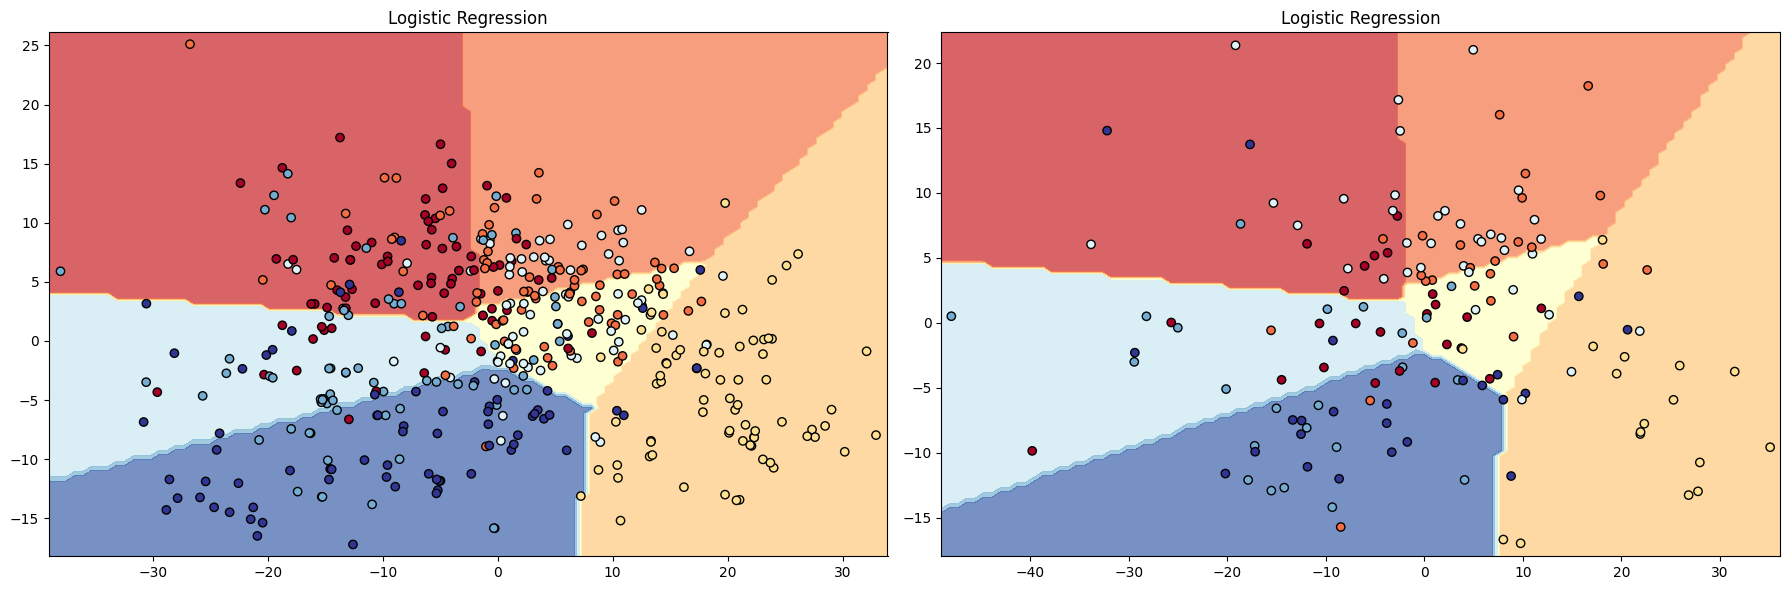

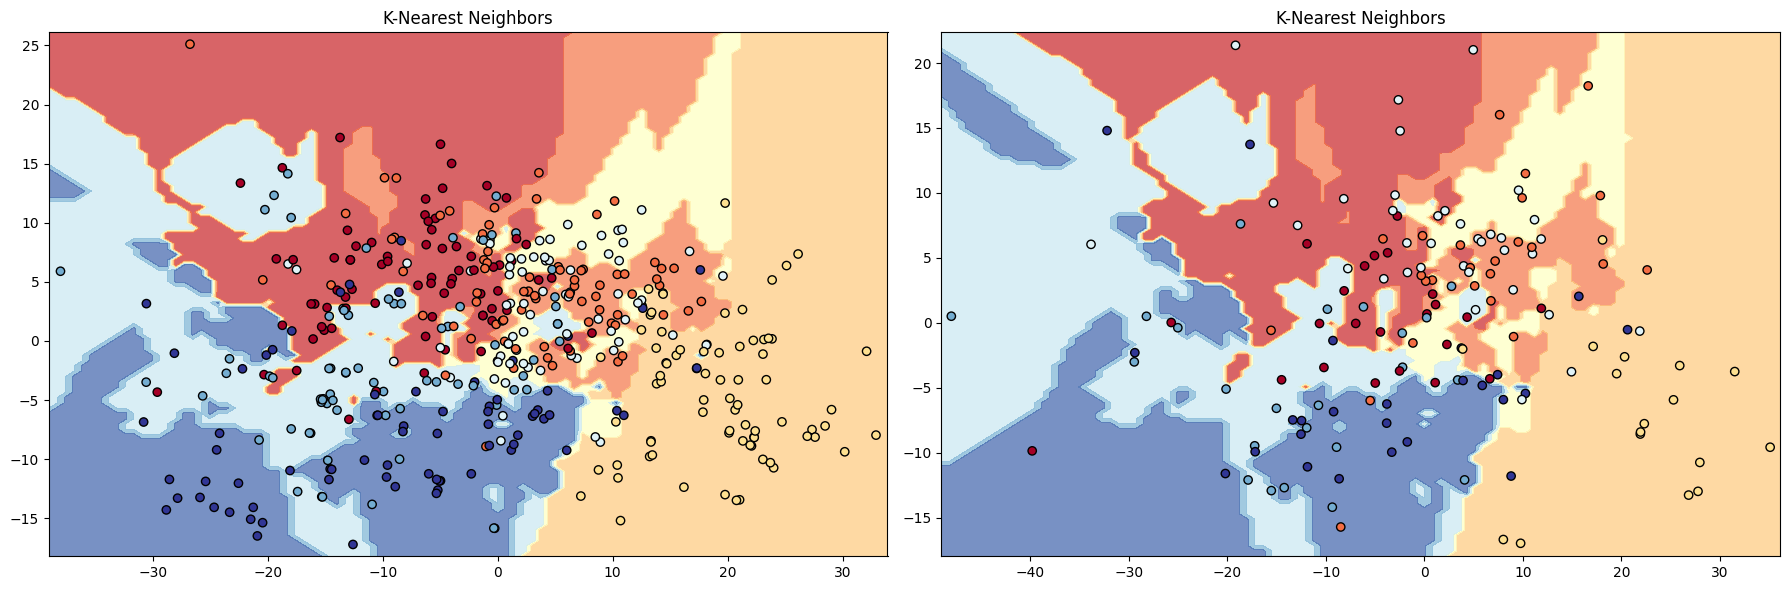

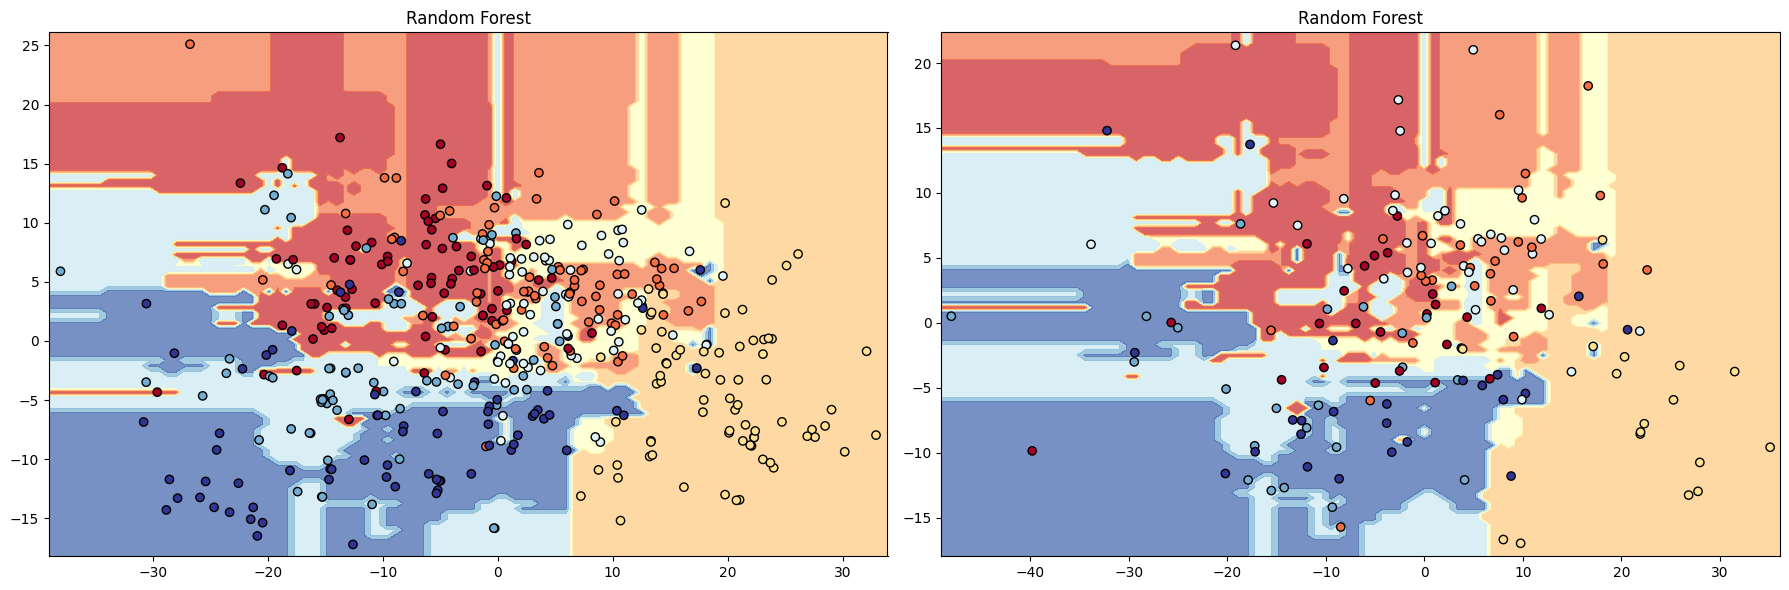

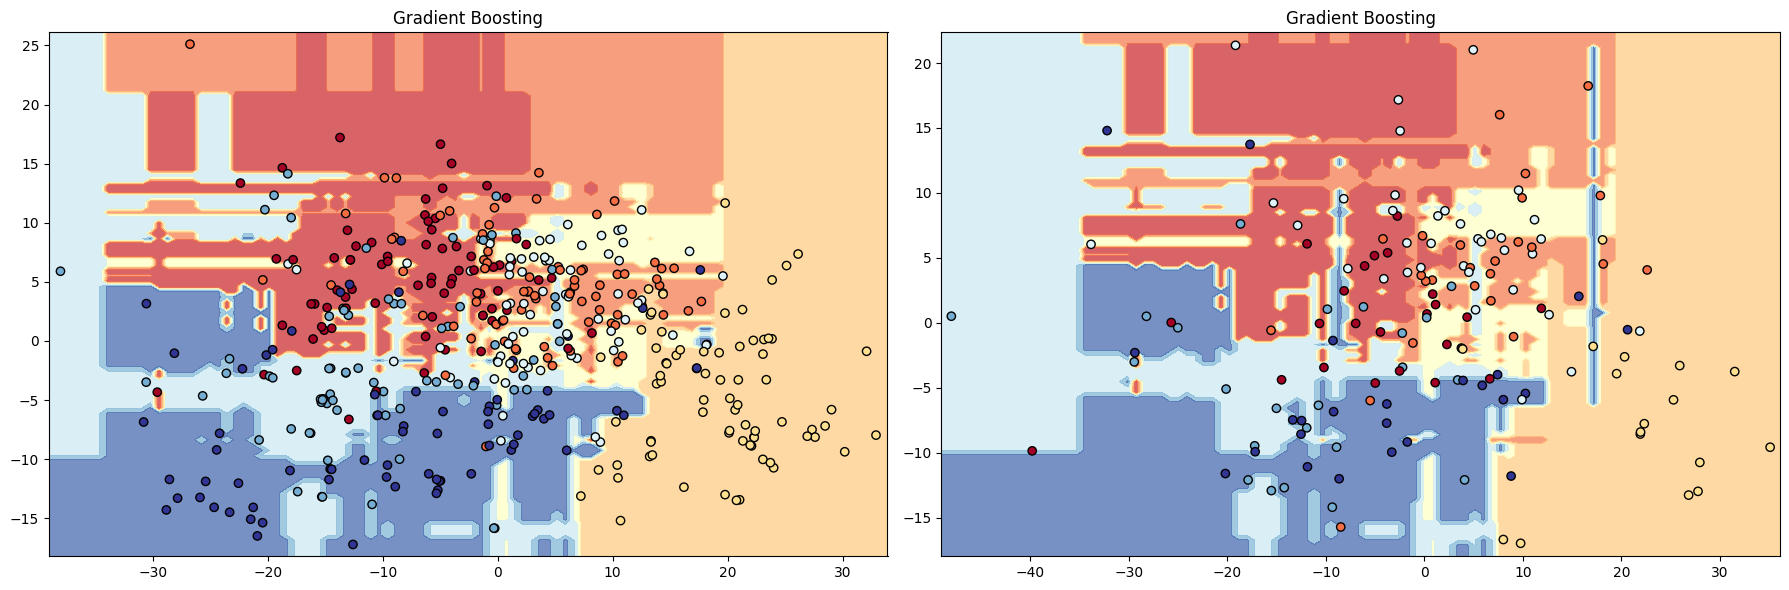

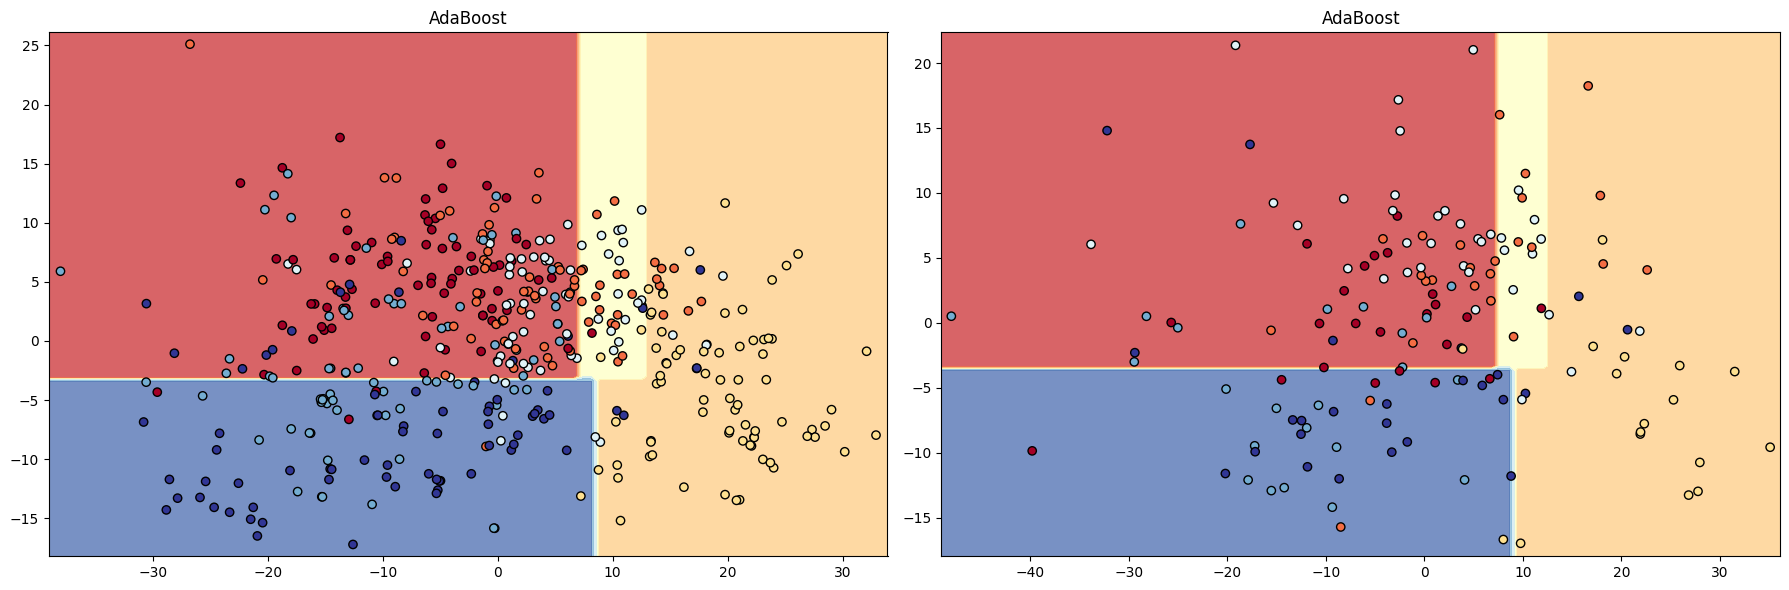

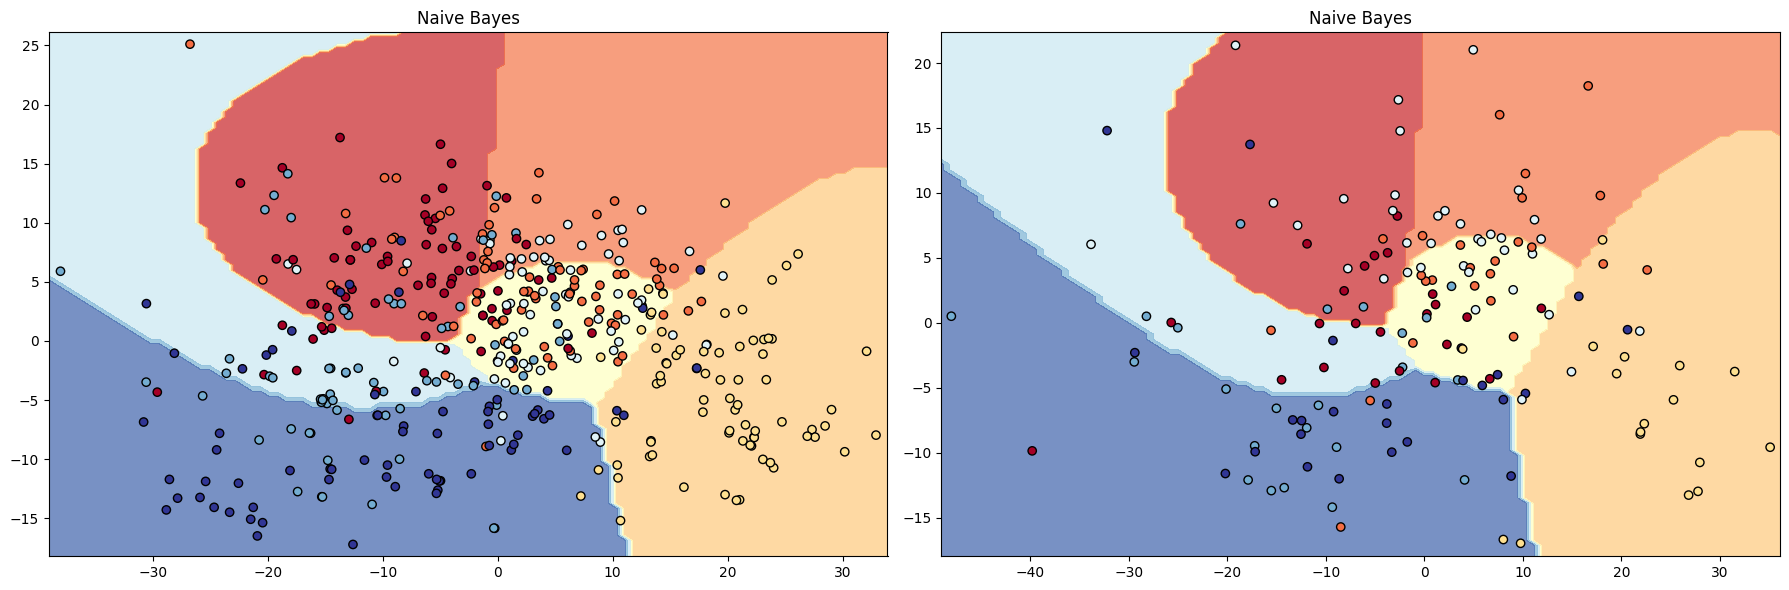

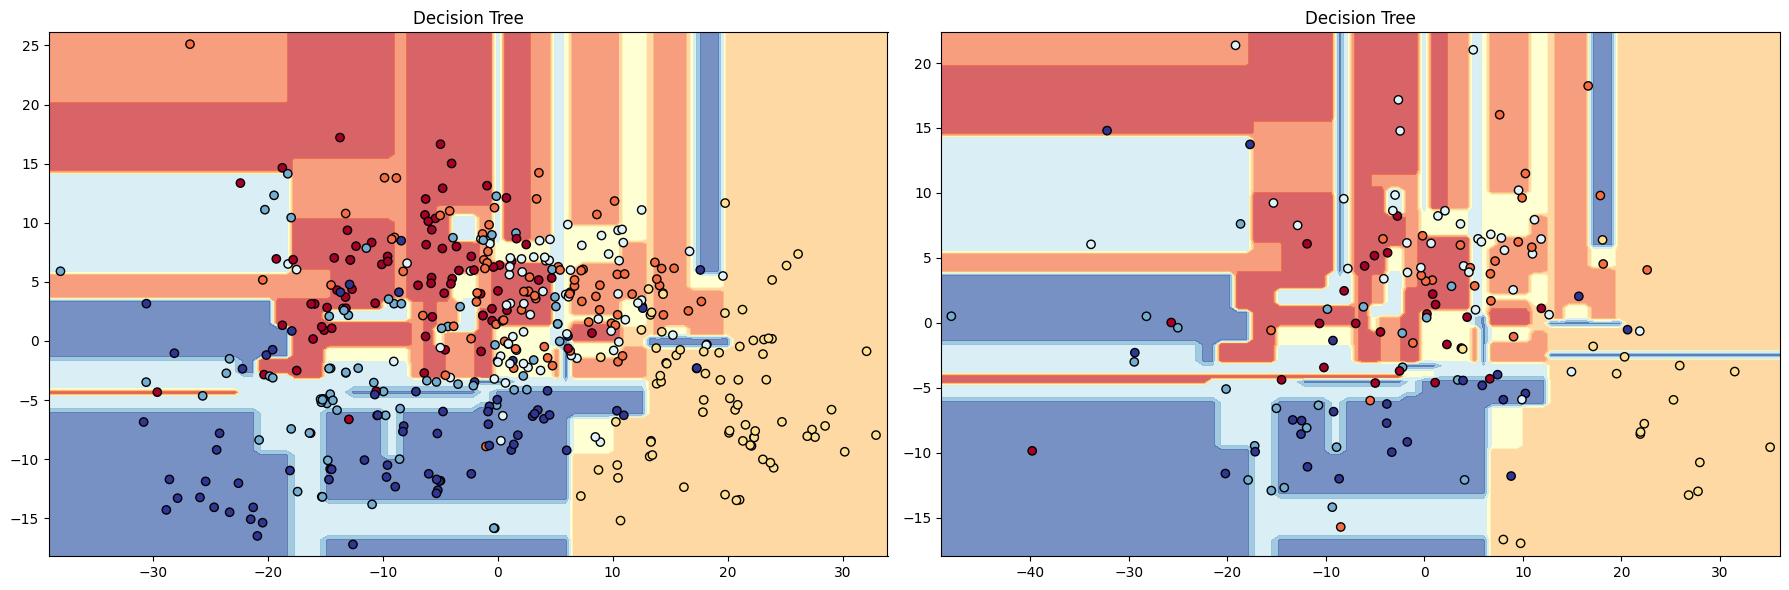

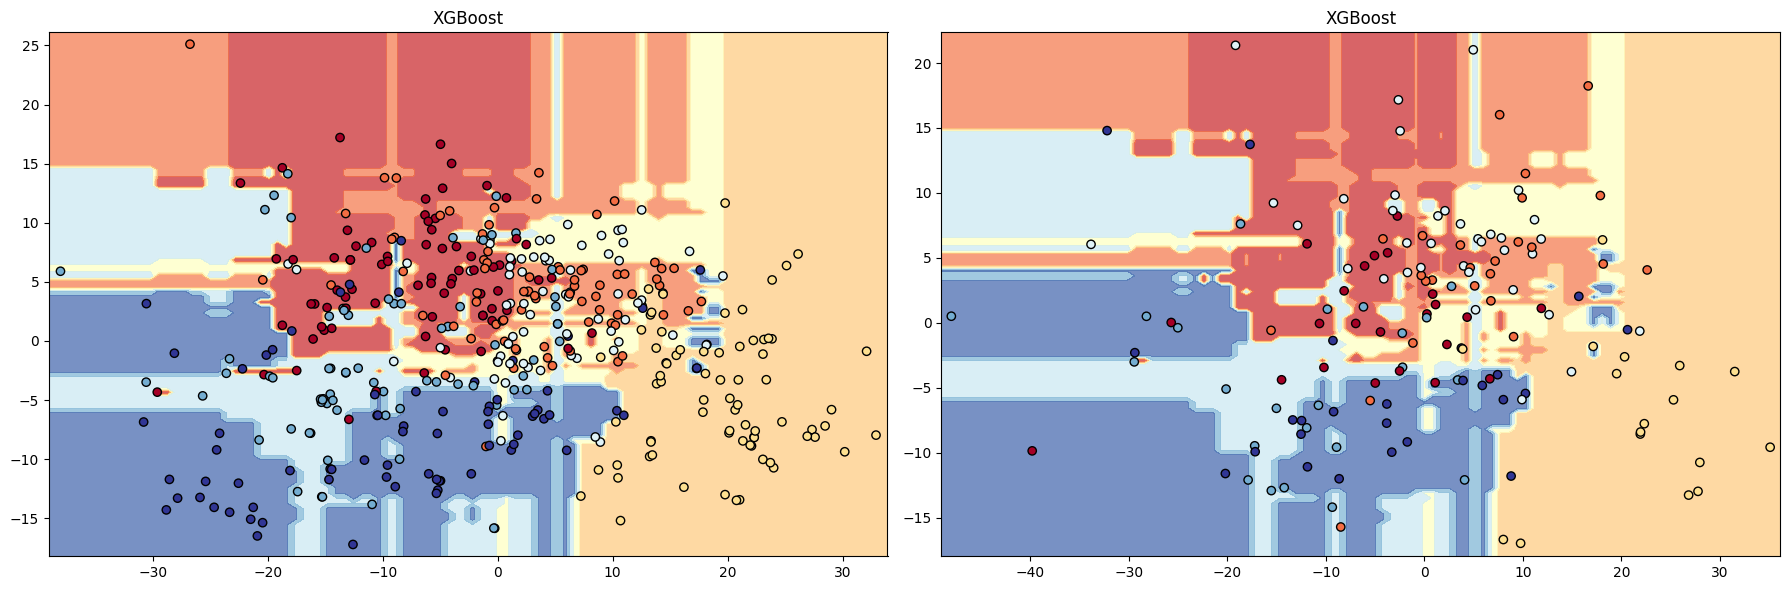

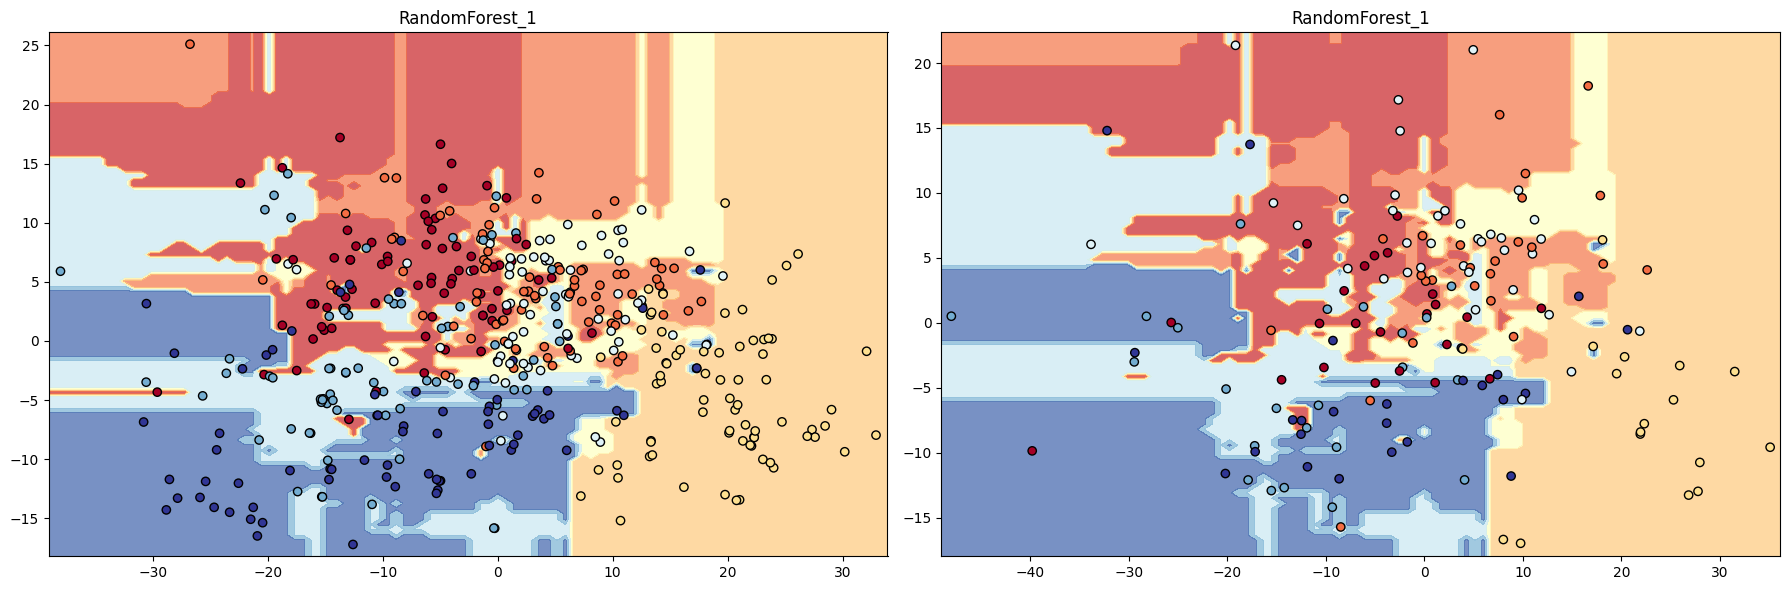

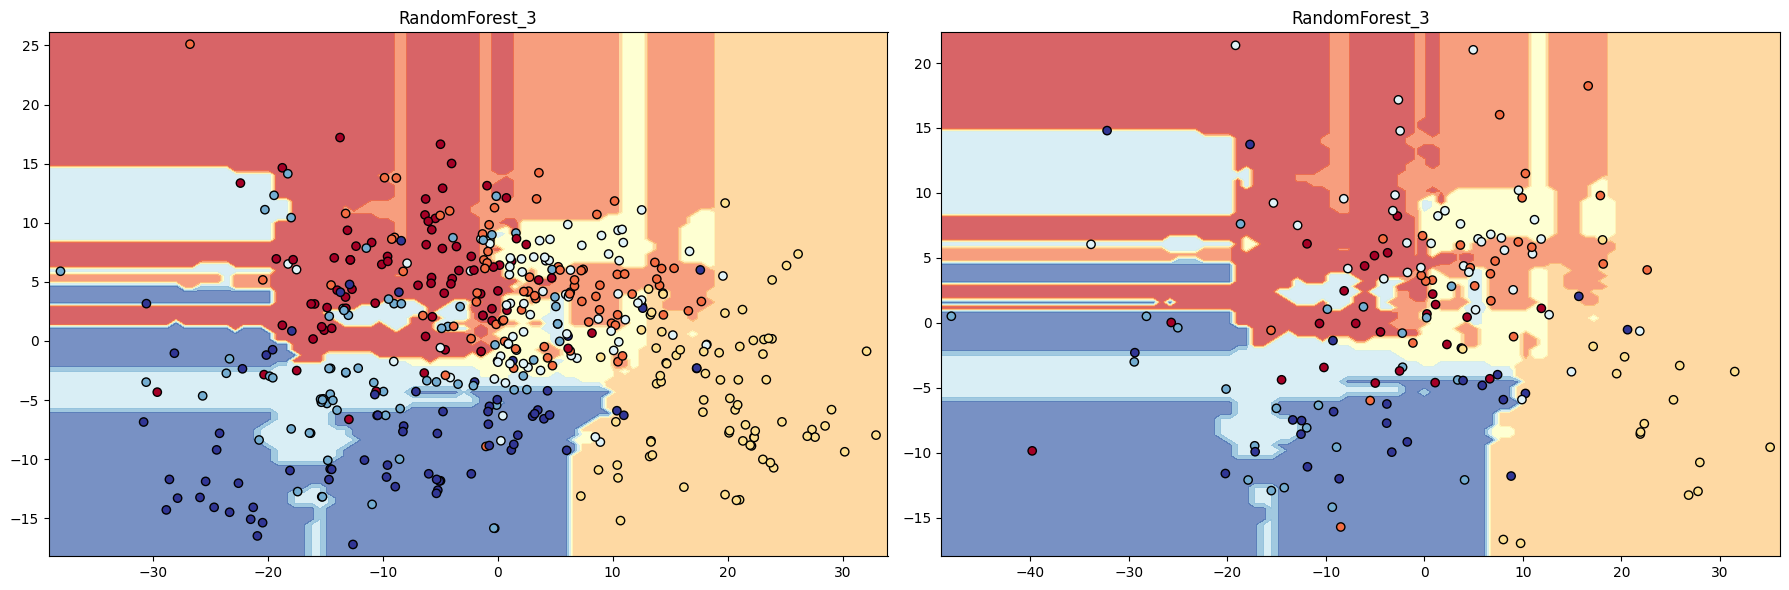

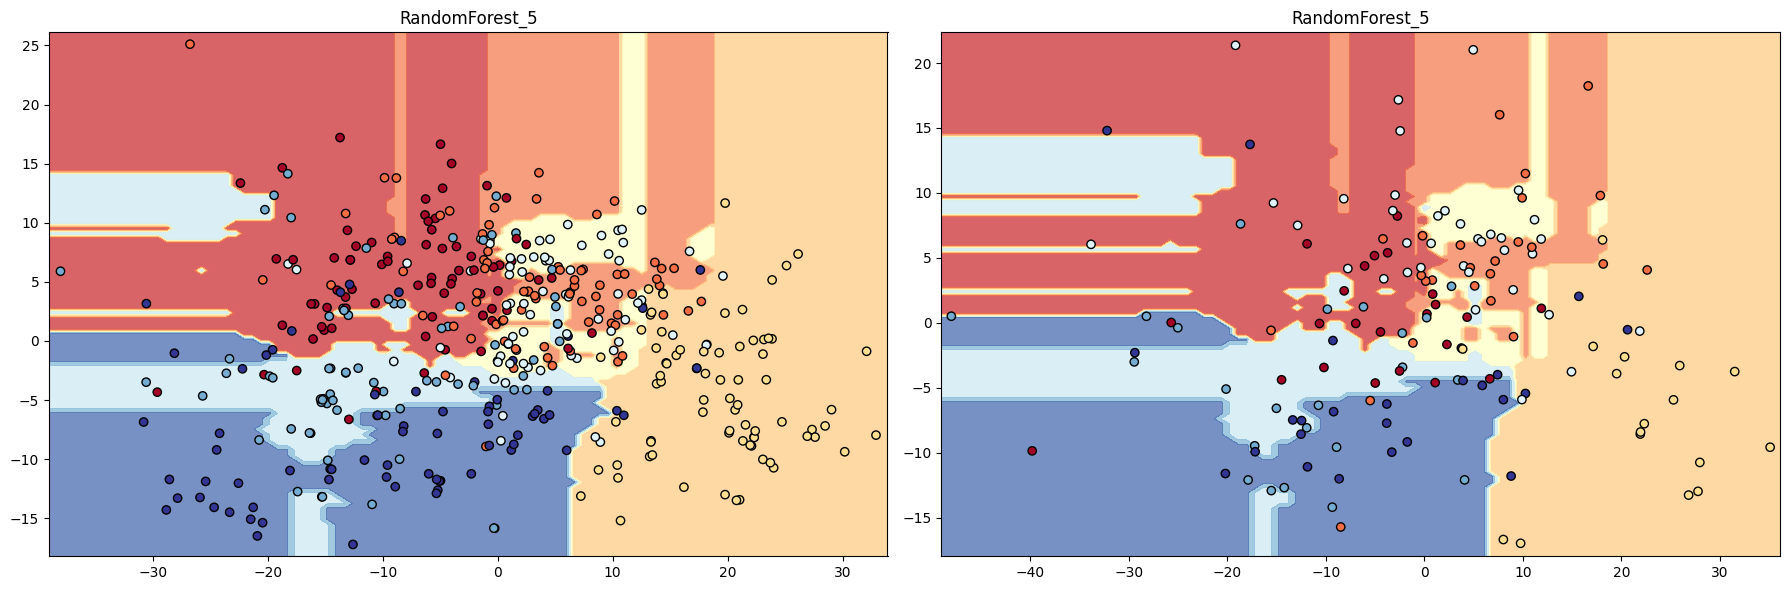

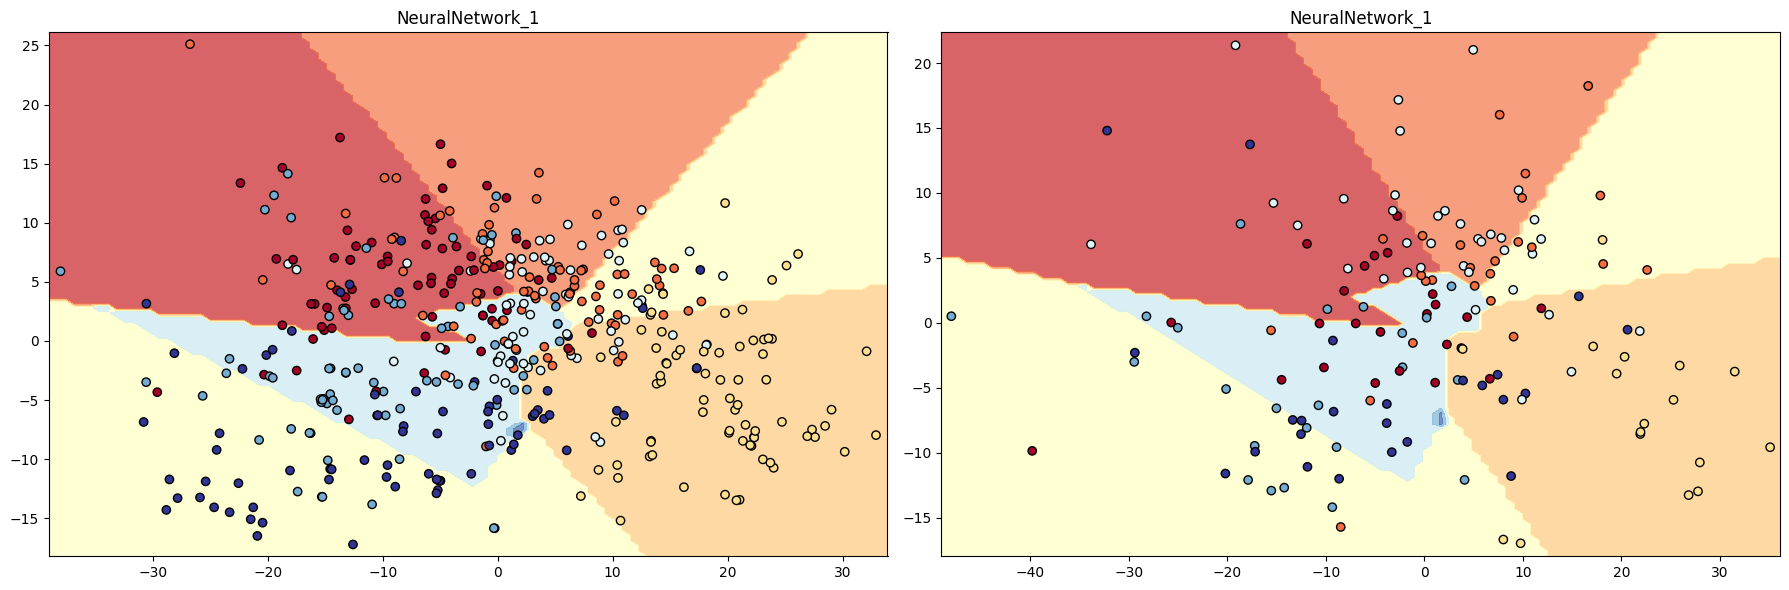

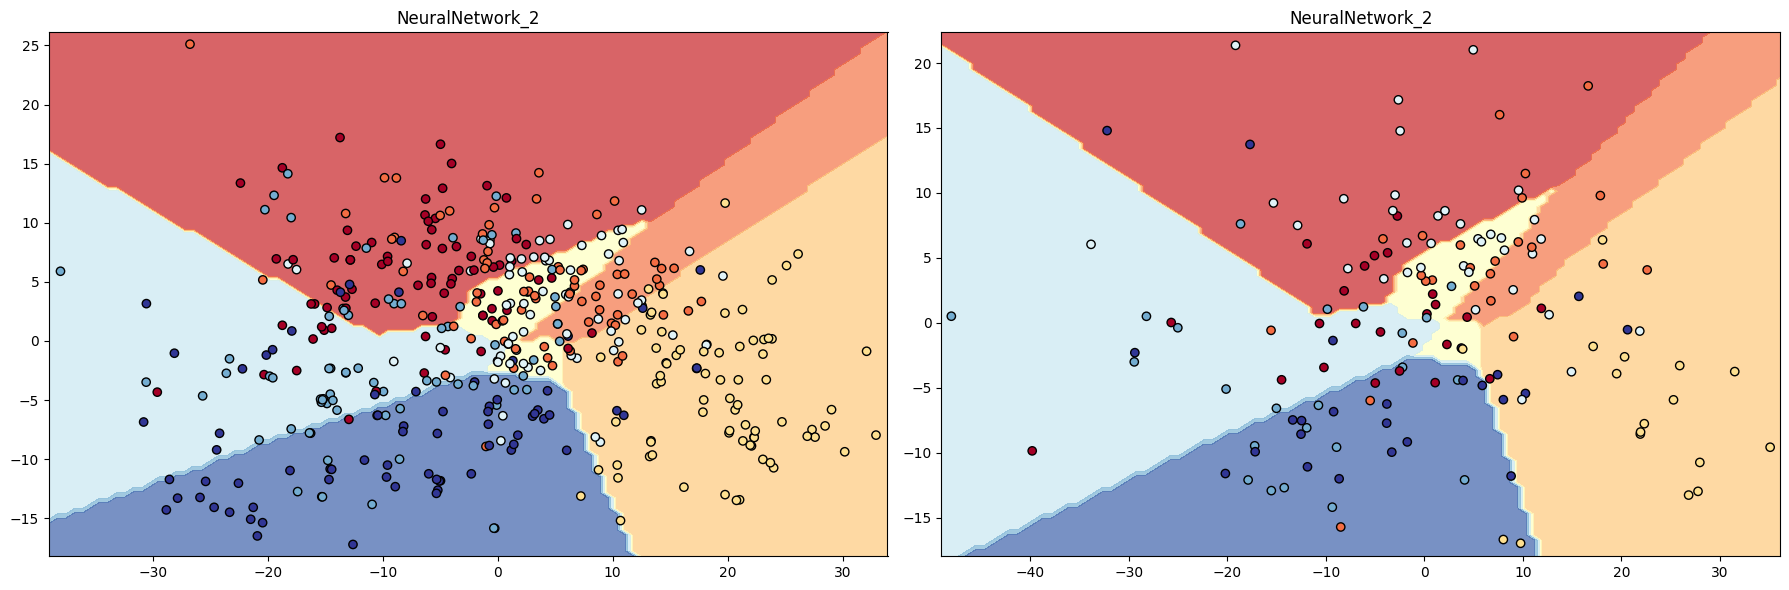

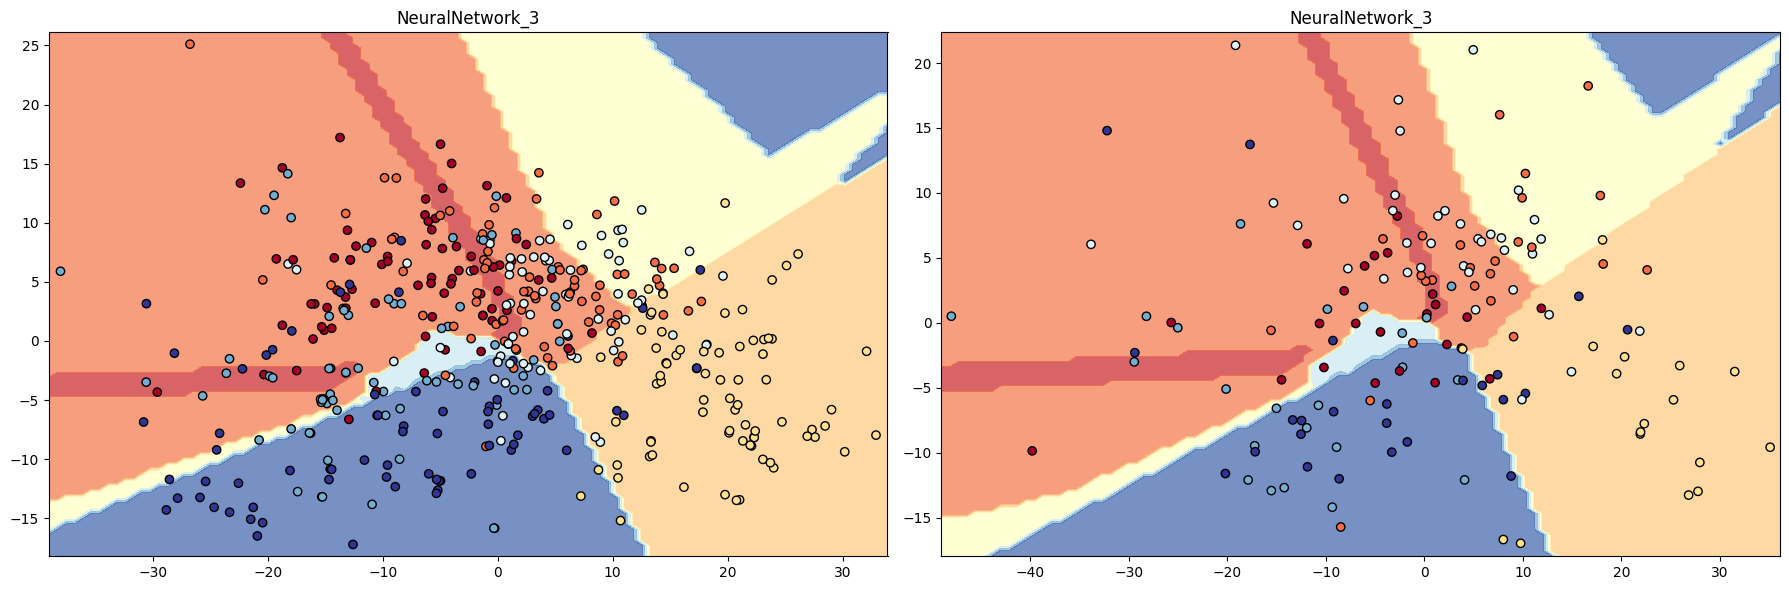

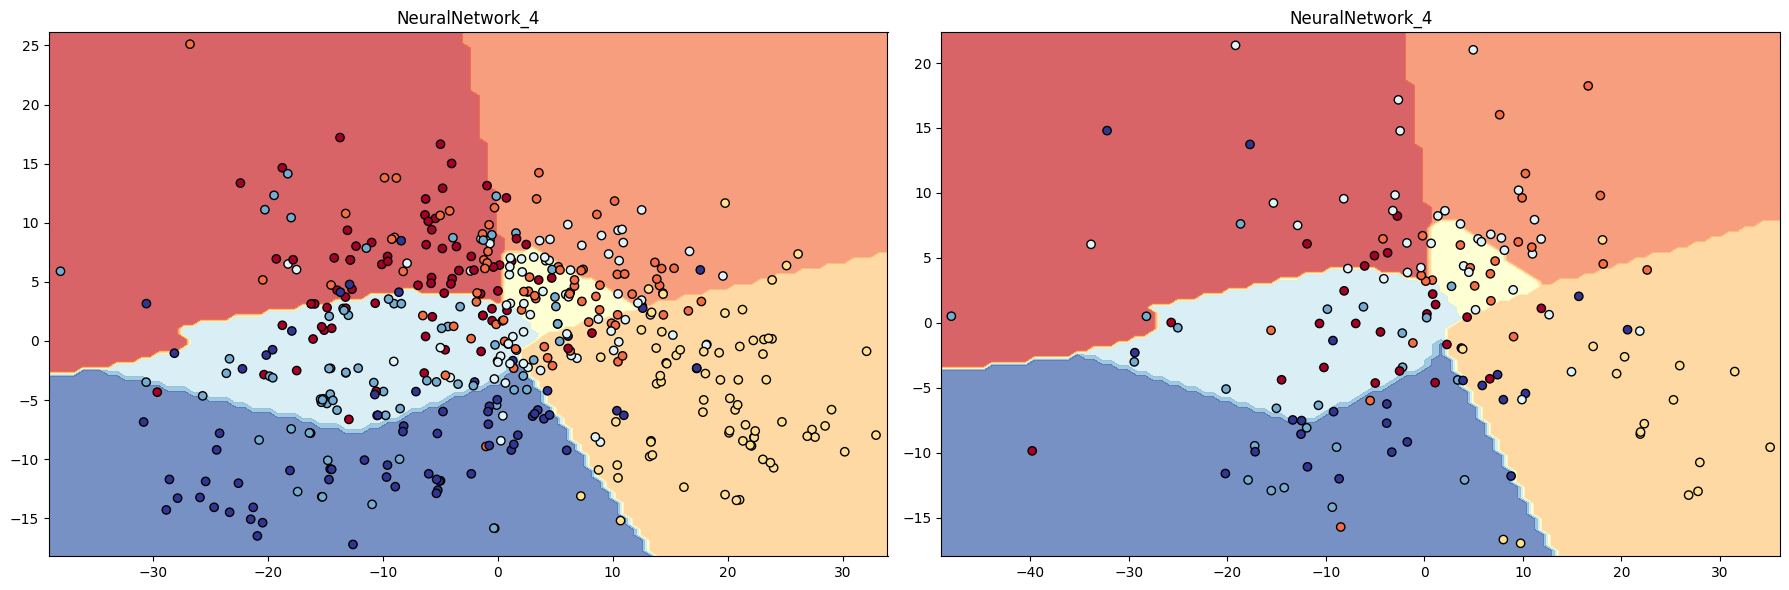

In [160]:
for model_name, model in models.items():
    print(f"\nTraining proxy {model_name}...")
    # Step 1: Reduce the original data to 2D for visualization purposes
    pca = PCA(n_components=2)
    X_train_2D = pca.fit_transform(X_train)
    X_test_2D = pca.transform(X_test)
    
    model.fit(X_train_2D, y_train_encoded)  # Train the model
    y_pred_train = model.predict(X_train_2D) #Predict on train set
    y_pred_test = model.predict(X_test_2D)  # Predict on the test set
    
    # # Storing metrics
    # results[model_name] = {
    #     "Accuracy_Train": accuracy_score(y_train_encoded, y_pred_train),
    #     "Accuracy_Test": accuracy_score(y_test_encoded, y_pred_test),
    #     "Precision": precision_score(y_train_encoded, y_pred_train, average='weighted'),
    #     "Precision": precision_score(y_test_encoded, y_pred_test, average='weighted'),
    #     "Recall": recall_score(y_train_encoded, y_pred_train, average='weighted'),
    #     "Recall": recall_score(y_test_encoded, y_pred_test, average='weighted'),
    #     "F1 Score": f1_score(y_train_encoded, y_pred_train, average='weighted'),
    #     "F1 Score": f1_score(y_test_encoded, y_pred_test, average='weighted'),
    #     "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred_test),
    #     "Classification Report": classification_report(y_train_encoded, y_pred_train),
    #     "Classification Report": classification_report(y_test_encoded, y_pred_test)
    # }
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    plot_decision_boundary(model, X_train, y_train_encoded, ax[0], resolution=100, title=model_name)
    plot_decision_boundary(model, X_test, y_test_encoded, ax[1], resolution=100, title=model_name)
    plt.tight_layout()
    plt.savefig(f'Images/{CURRENT}_decision_boundary_{model_name}.png', dpi=1000)
    fig.show()